#Assignment 01

##Phase 1: EDA & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
#mounting drive for initializing dataframe
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading dataset
data = pd.read_csv('/content/drive/MyDrive/Classroom/Adv. ML   ML for DS/Assignment01/data.csv')

In [ ]:
#printing head of dataset
print(data.head())

#printing description of dataset
print(data.describe())

#printing info of the dataset
data.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

###Missing values check & handling

In [ ]:
#dropping unnammed column
data.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
#Checking null values
print(data.isnull().sum)

<bound method DataFrame.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean

In [ ]:
#dropping na values
data.dropna(inplace=True)

In [ ]:
#checking sum of values
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#printing datainfo now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

###Visualize class distribution

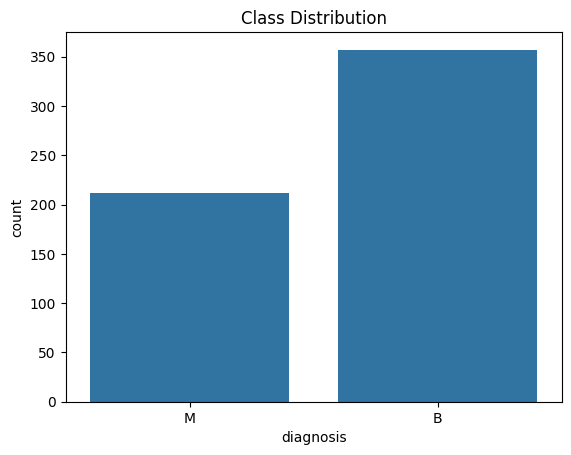

In [ ]:
#Plotting countplot for visualizing the class distribution
sns.countplot(x='diagnosis', data=data)
plt.title("Class Distribution")
plt.show()

###Perform correlation analysis

In [ ]:
#For Label encoding our target to analyze its corr
label_encoder = LabelEncoder()

#Fitting encoder to diagnosis column for transforming it as it is the target
data['diagnosis_encoded'] = label_encoder.fit_transform(data['diagnosis'])

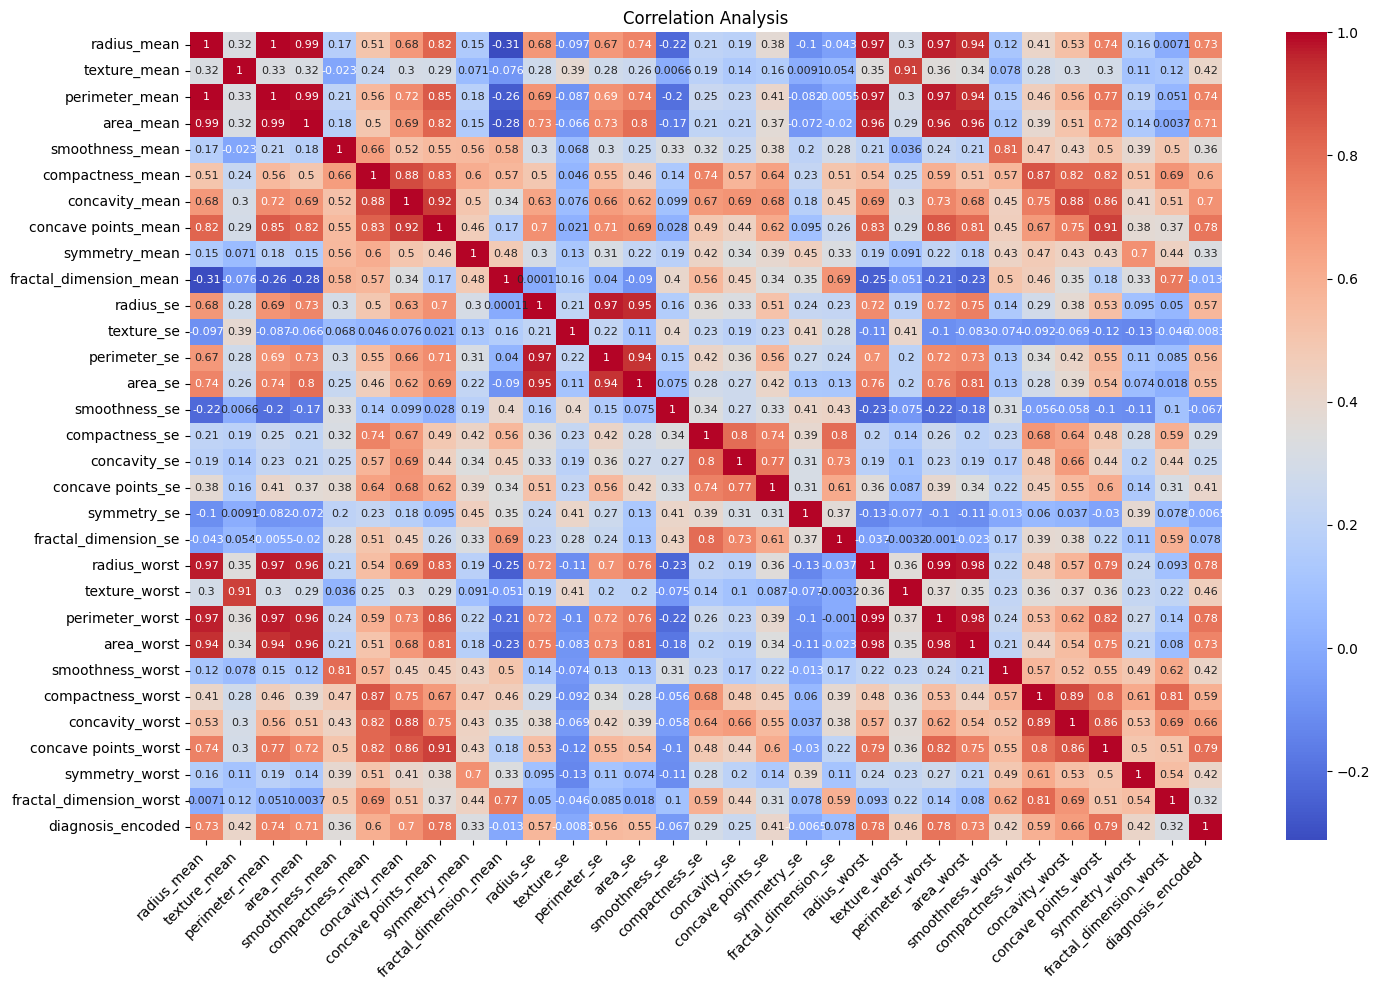

In [ ]:
#Corr Analysis
plt.figure(figsize=(15, 10))
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.drop(columns=['id']).corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title("Correlation Analysis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Dropping the extra encoded column
# data = data.drop(columns=['diagnosis_encoded'])

###Identify outliers

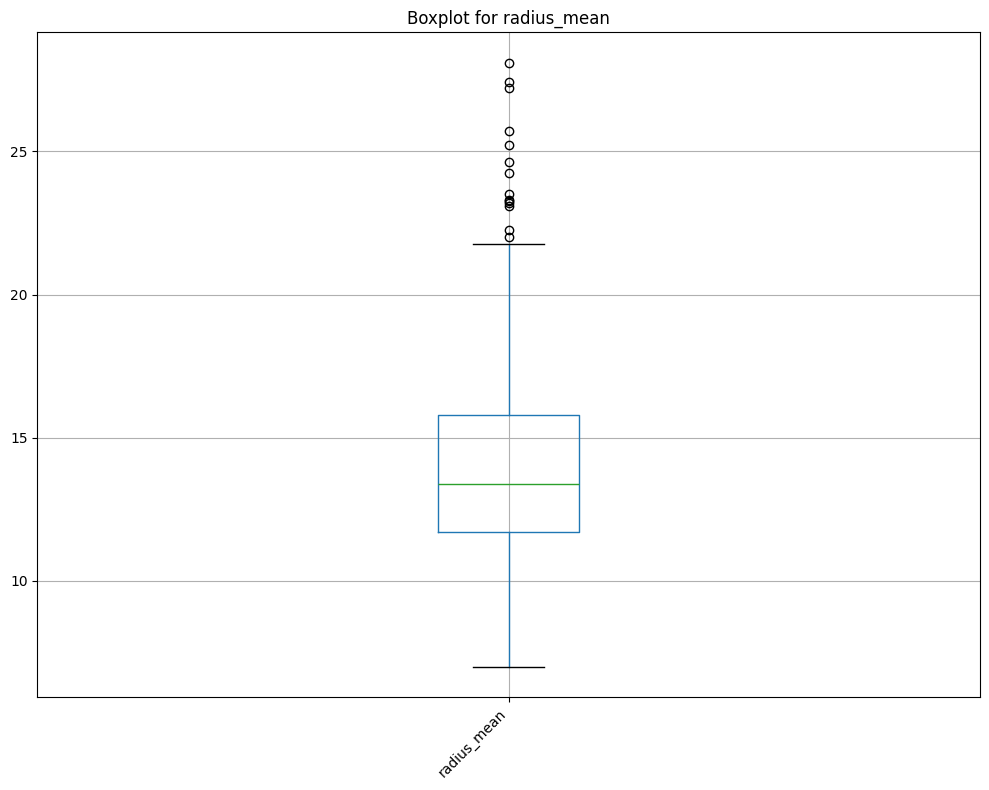

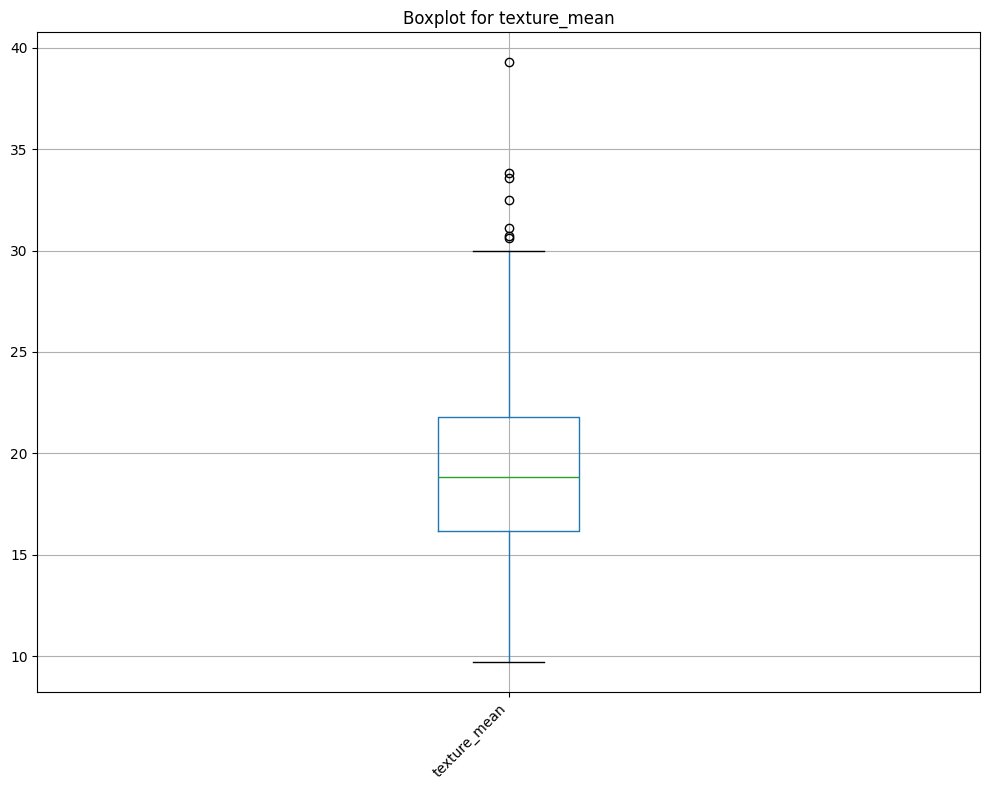

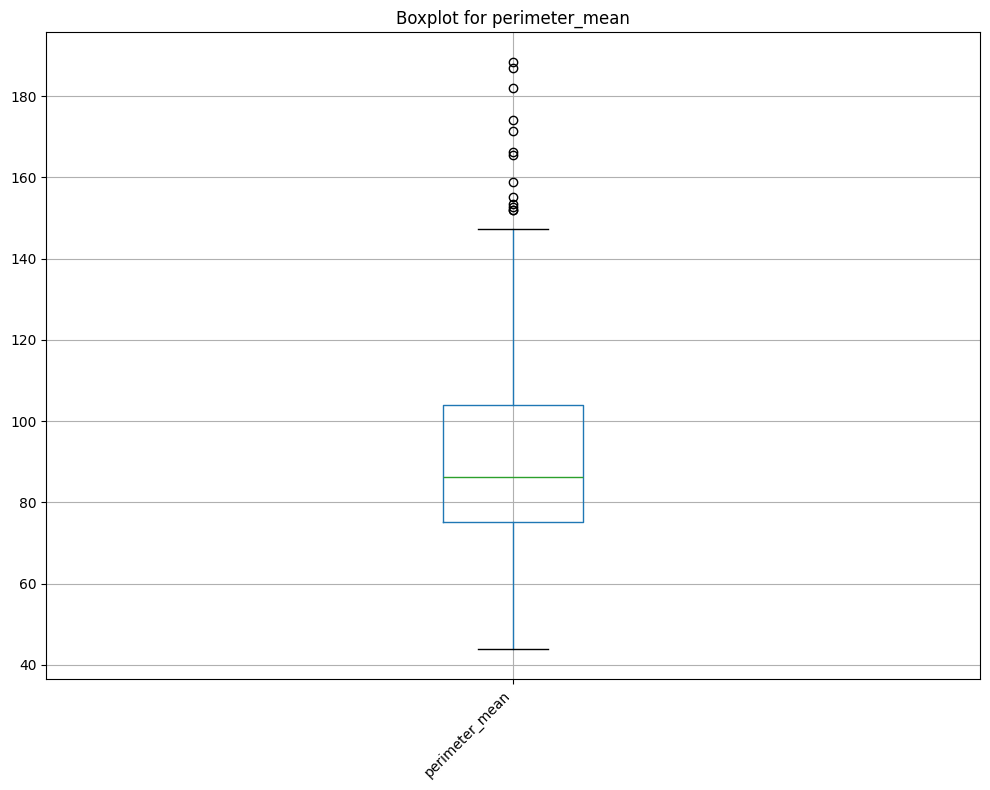

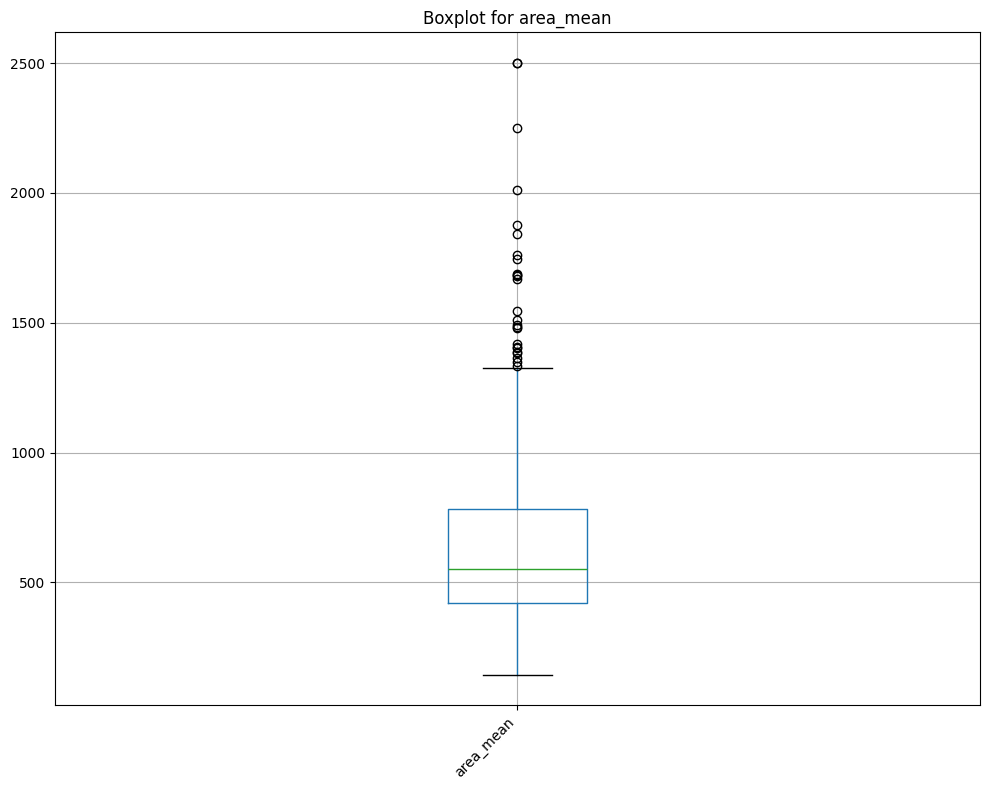

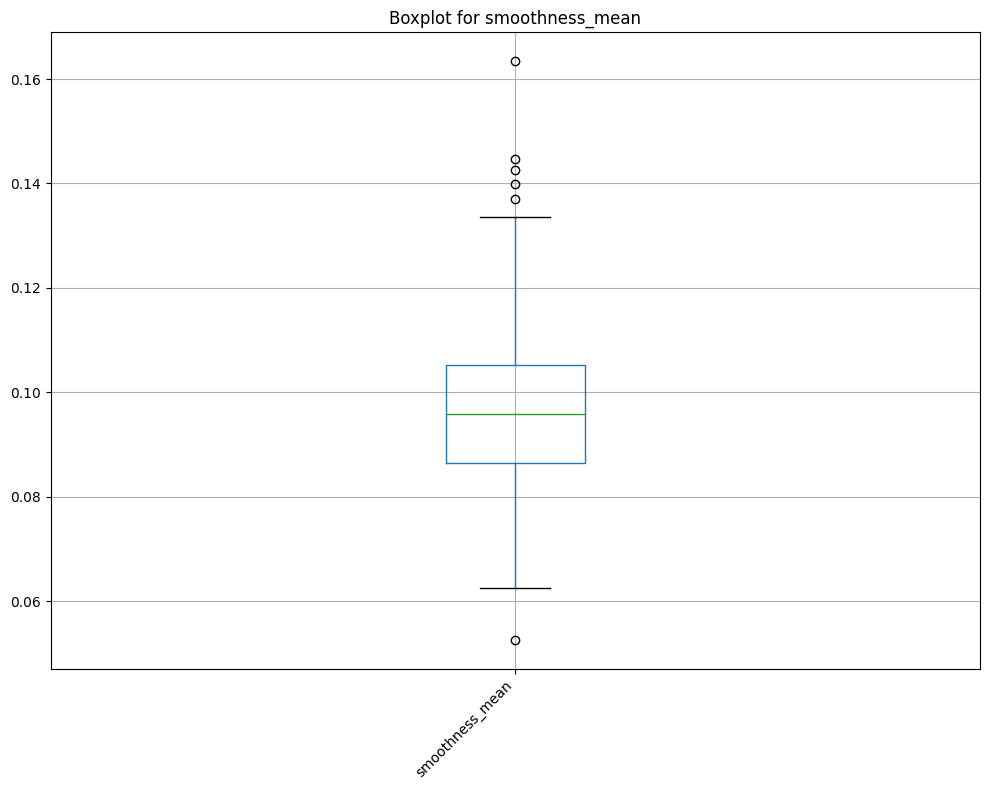

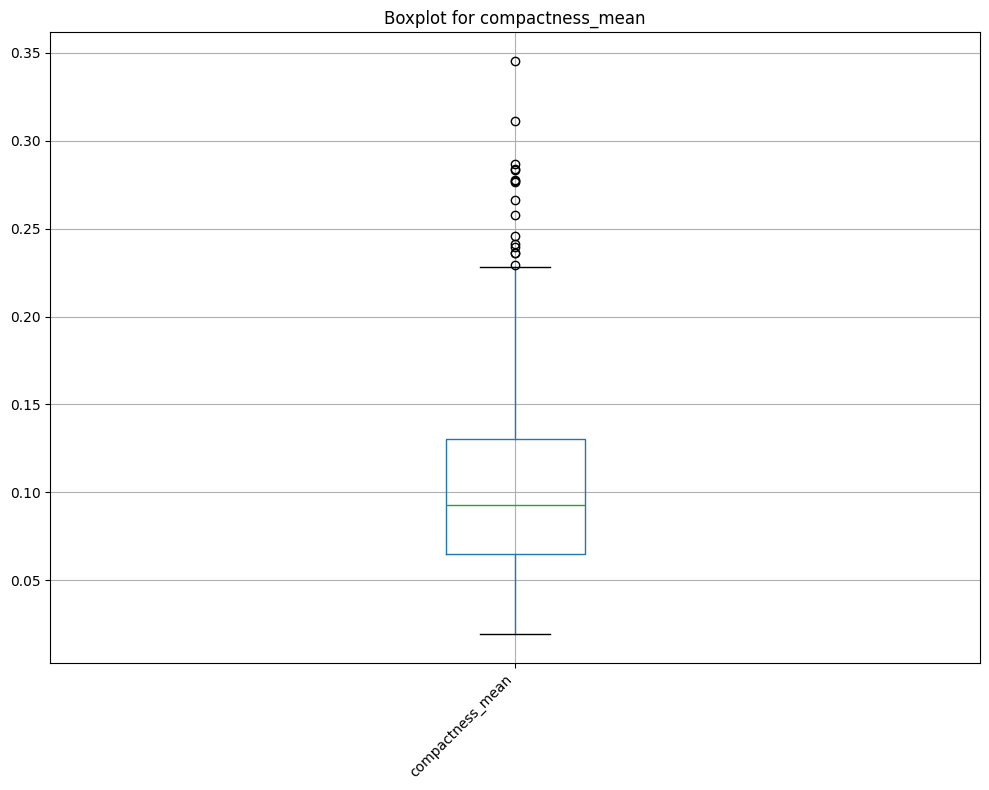

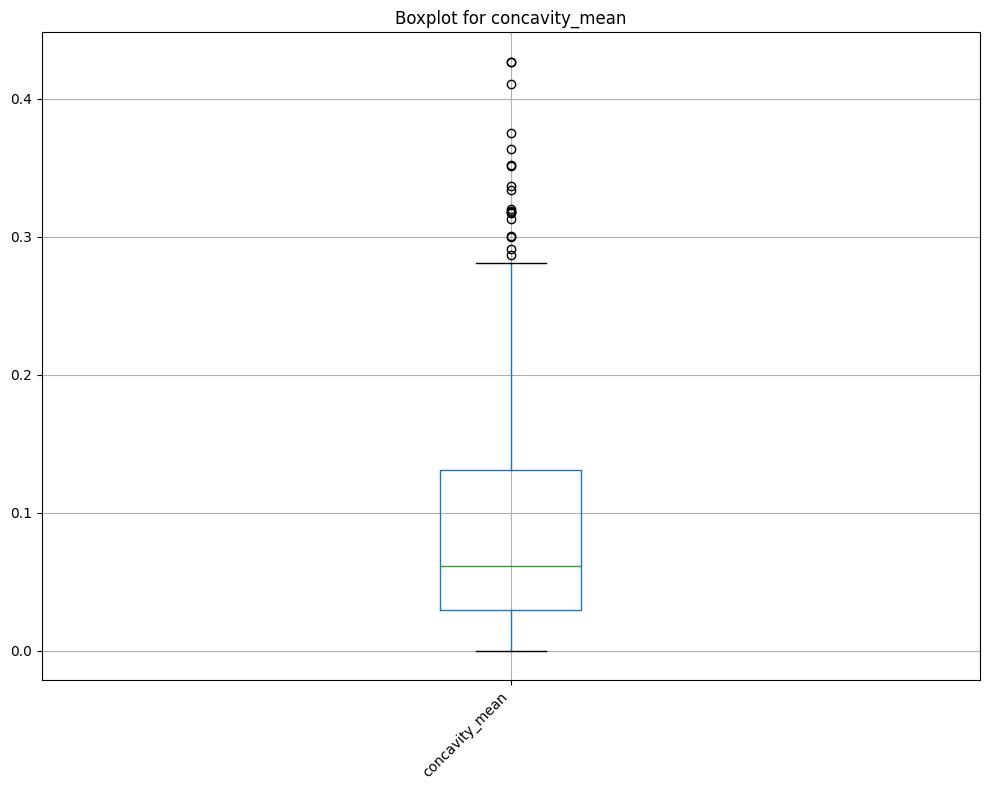

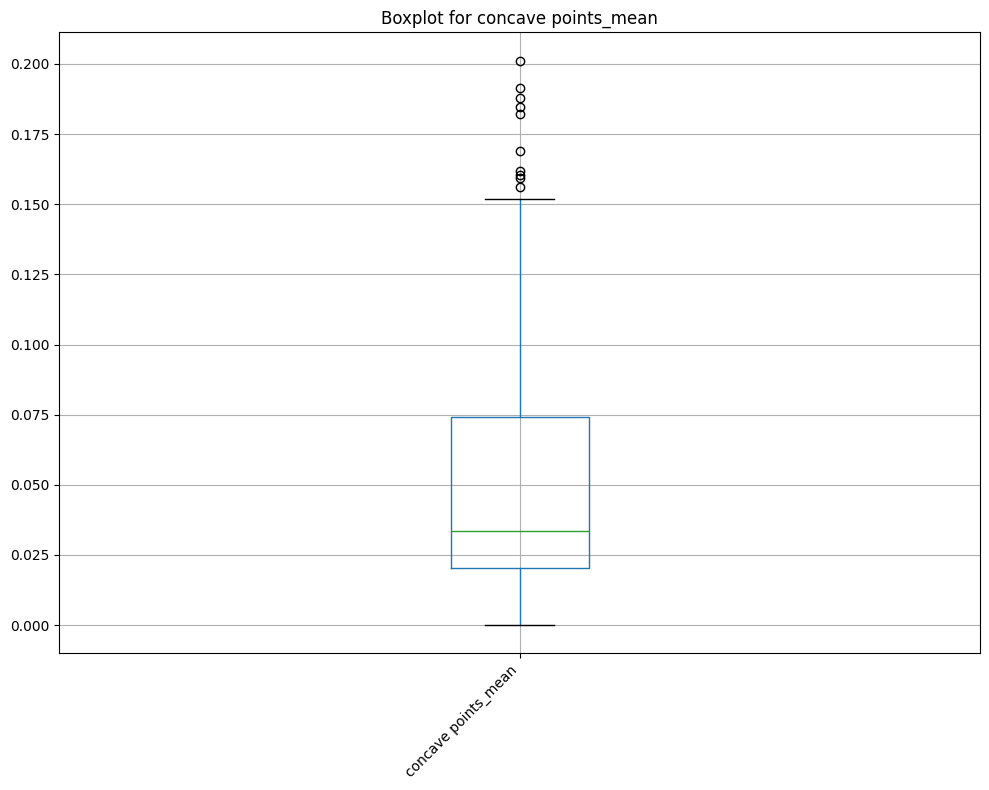

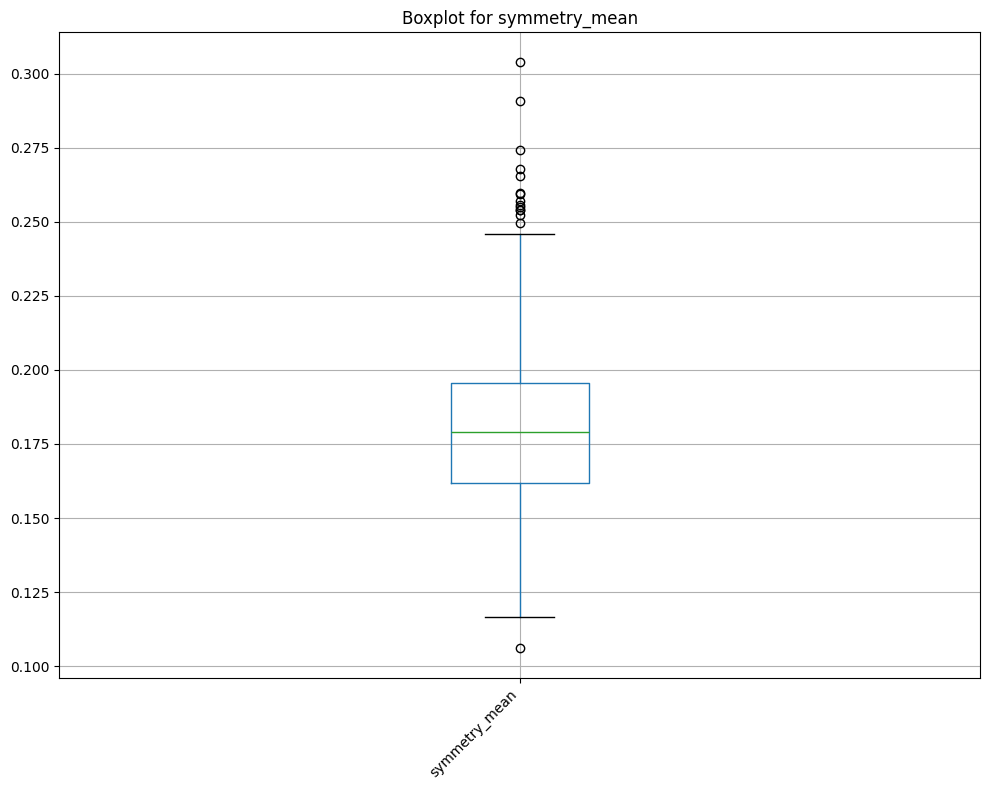

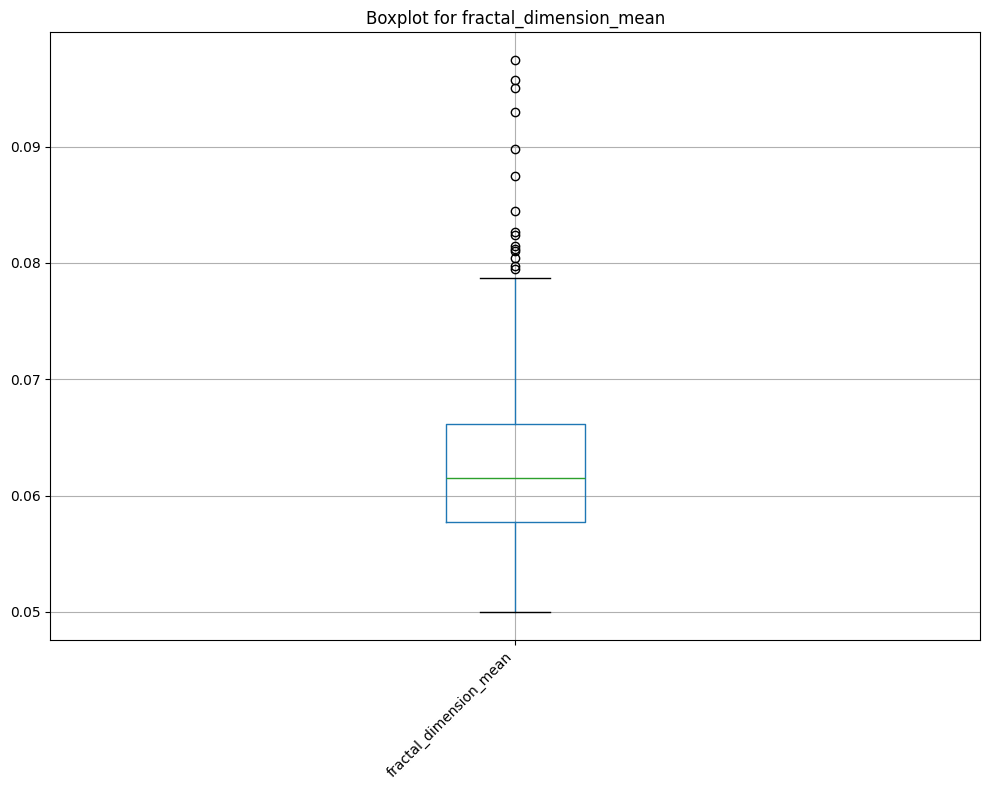

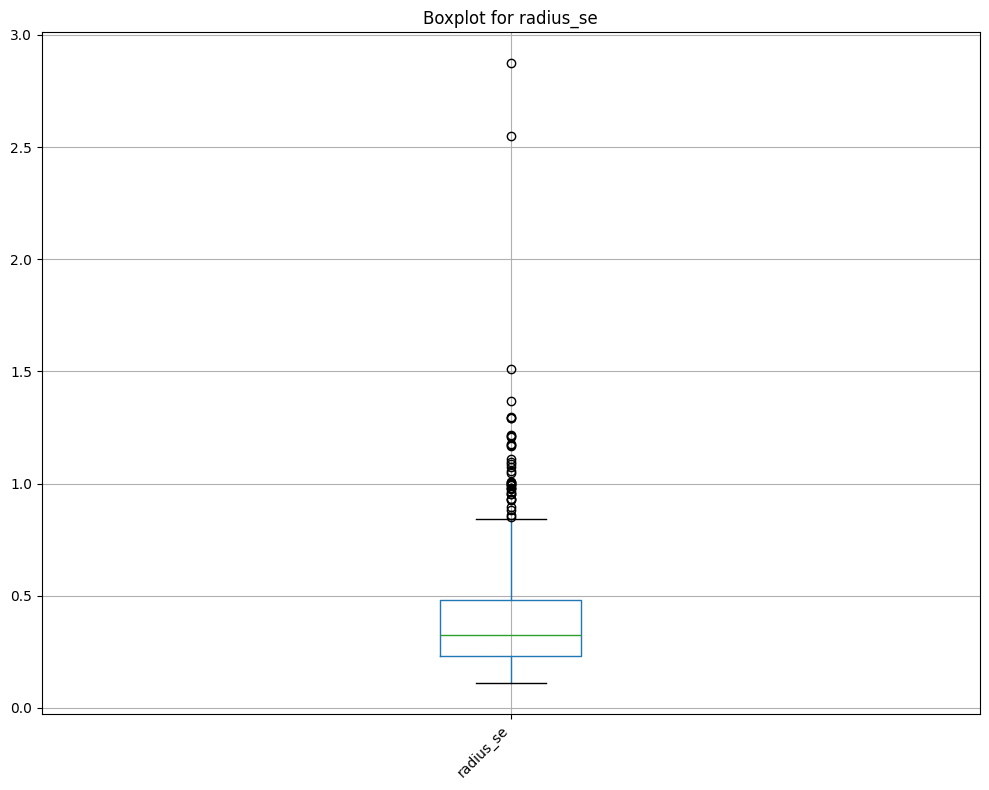

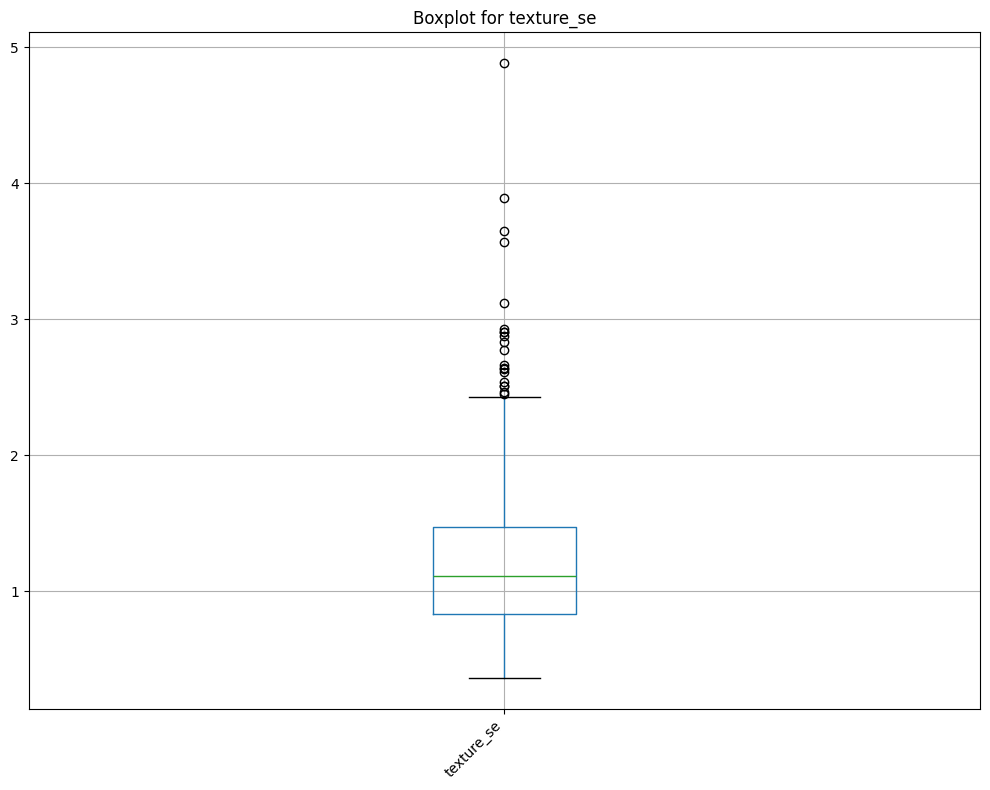

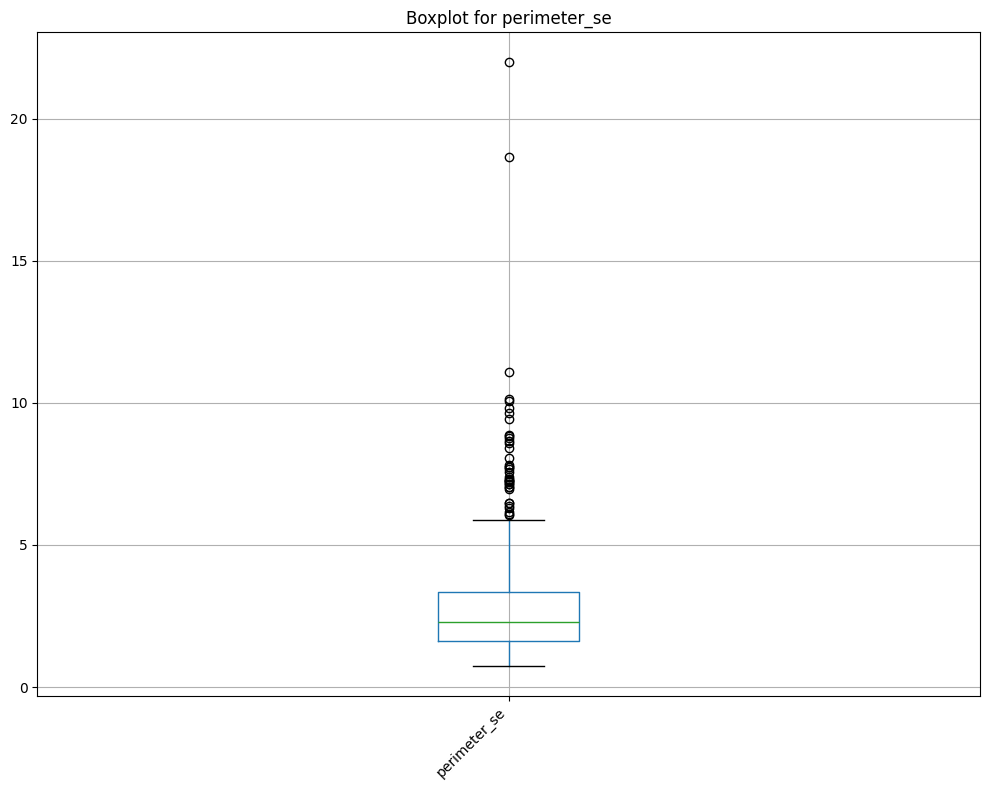

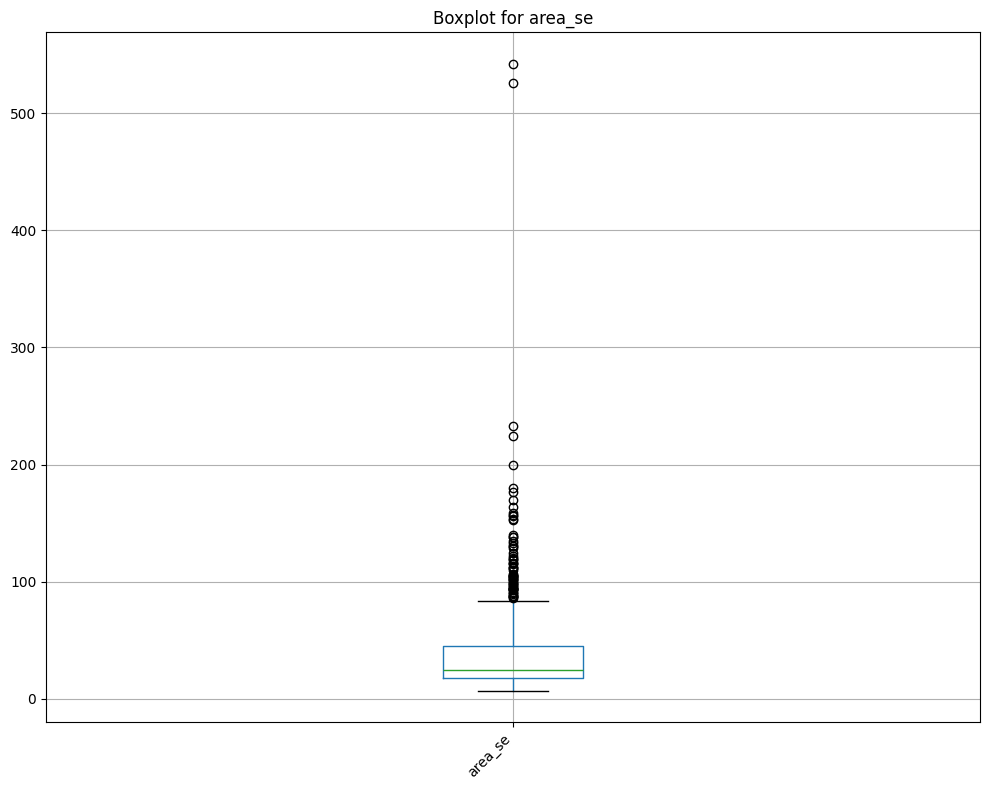

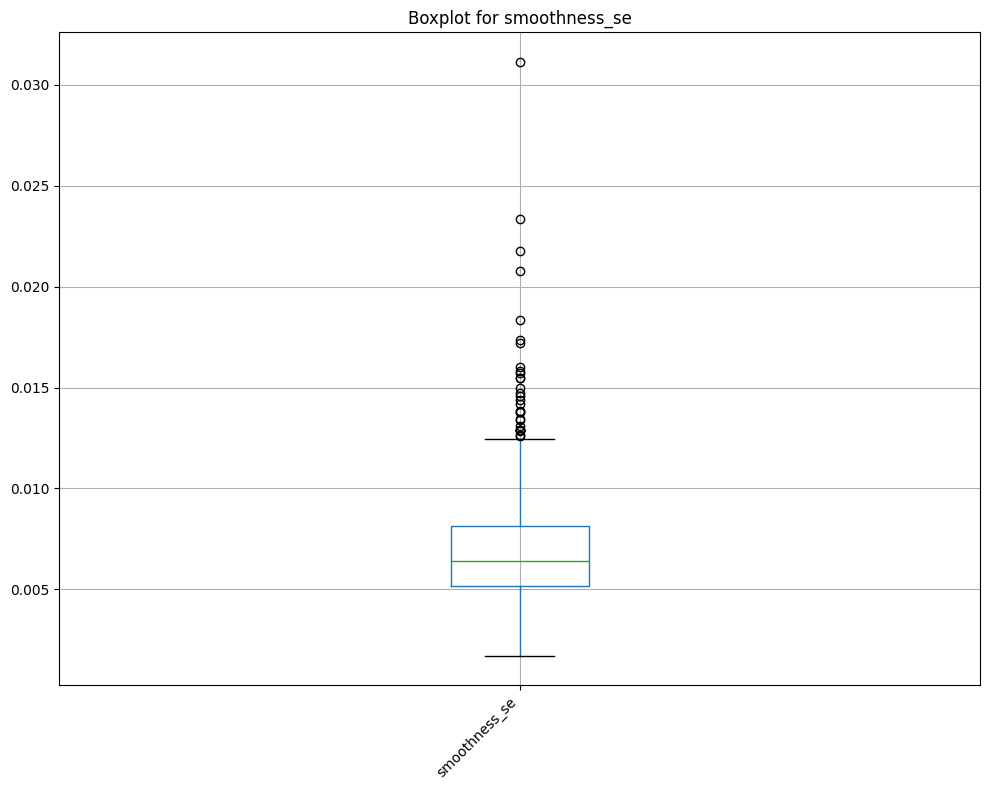

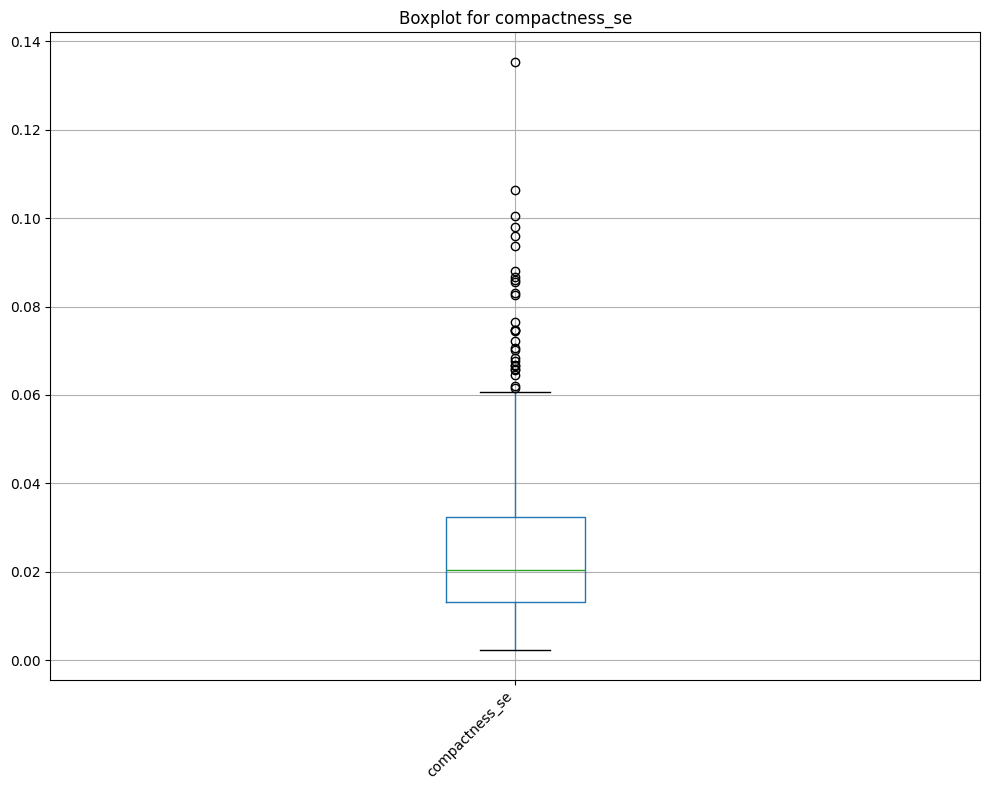

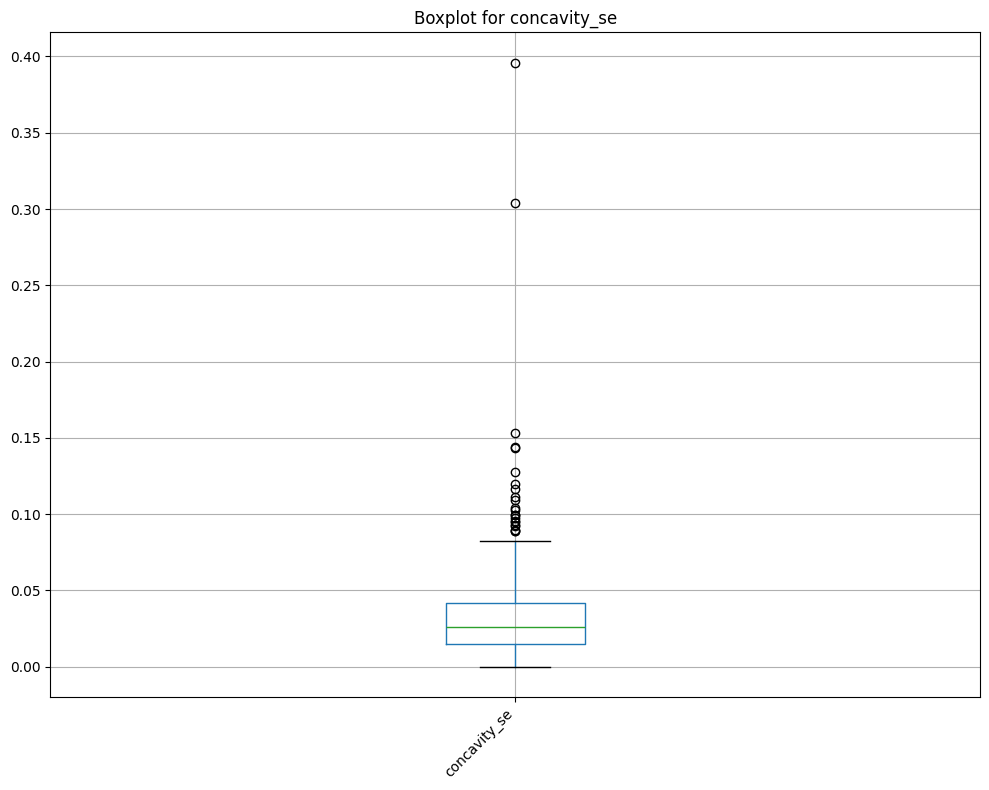

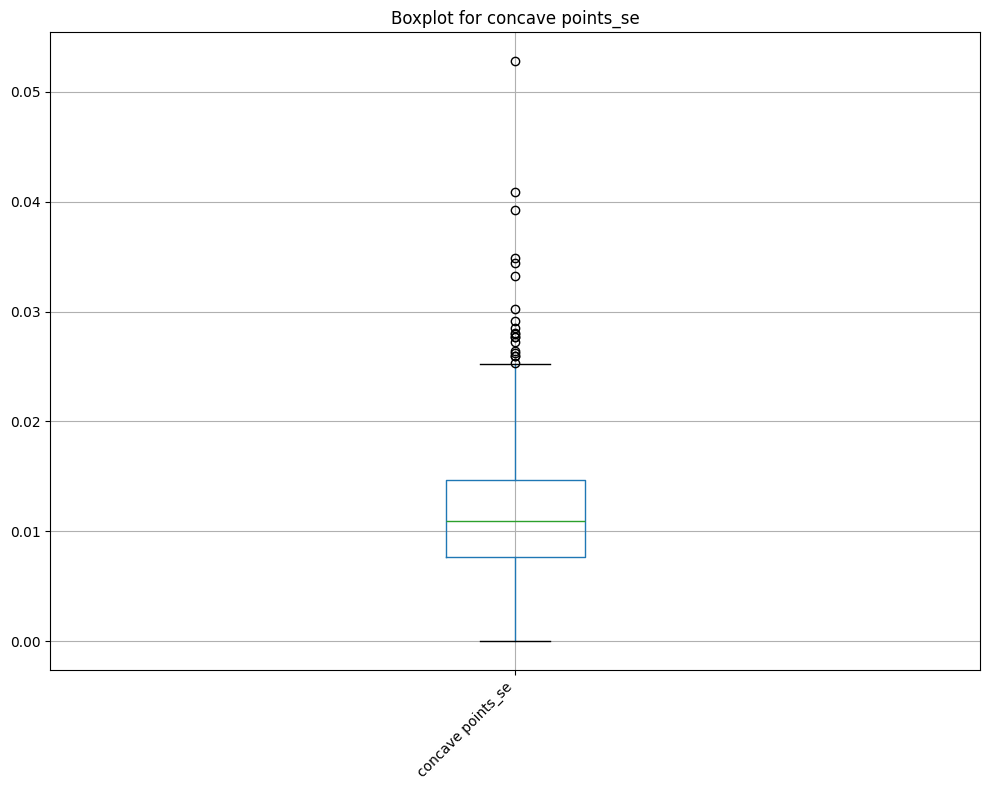

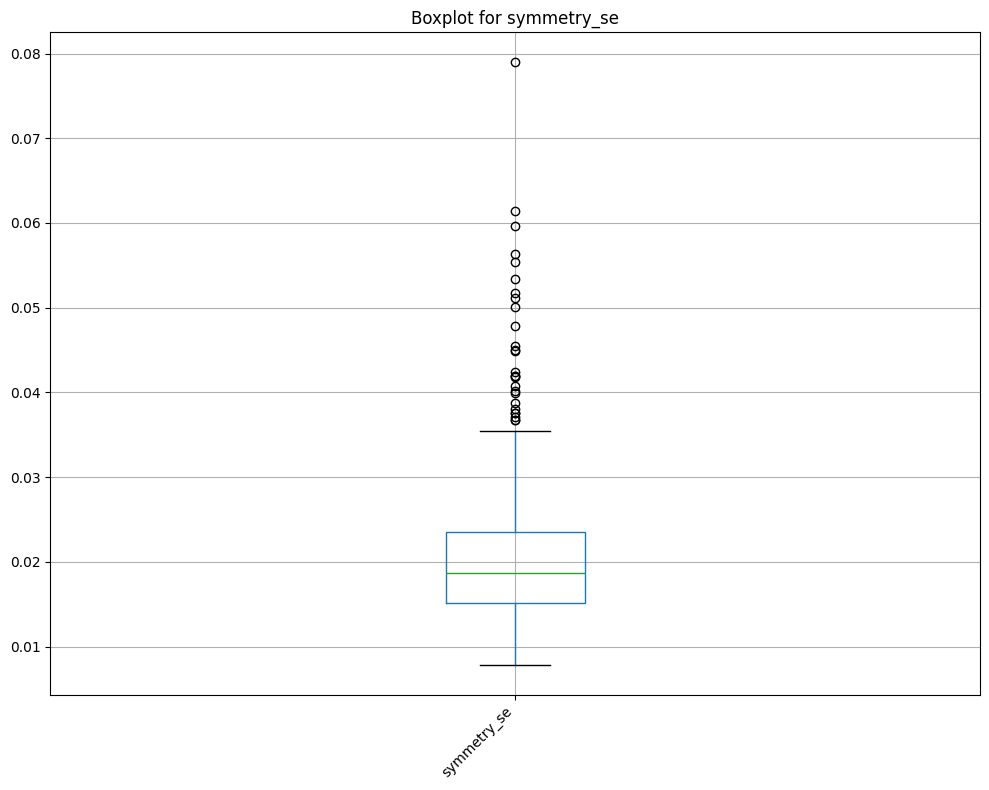

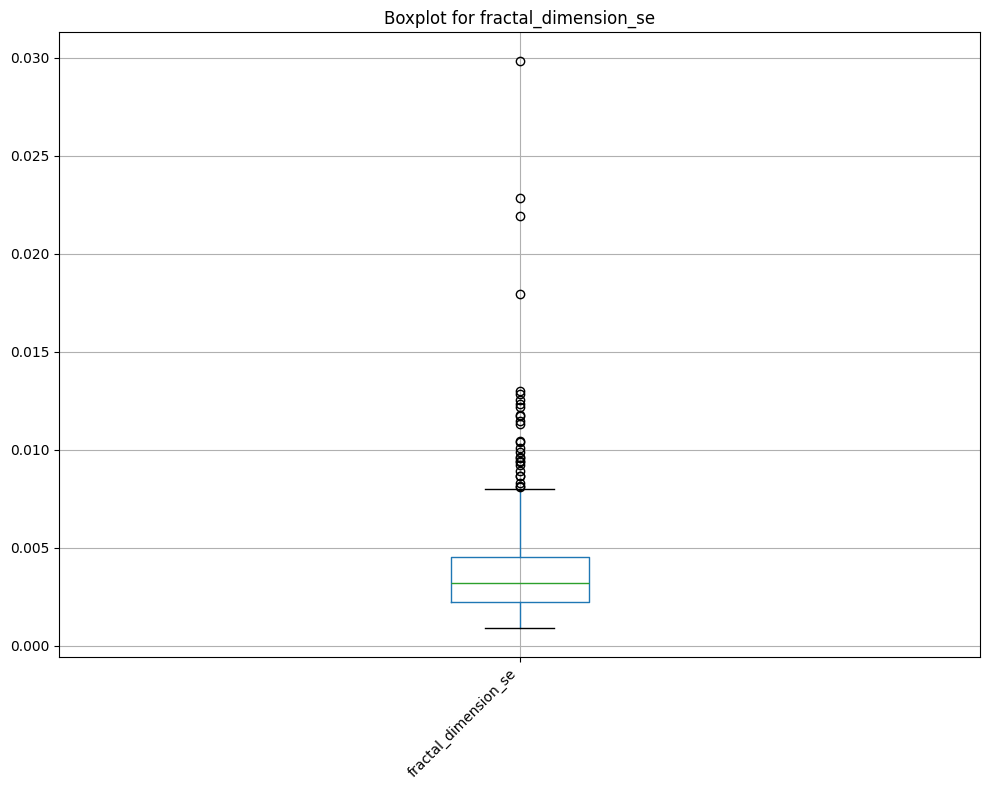

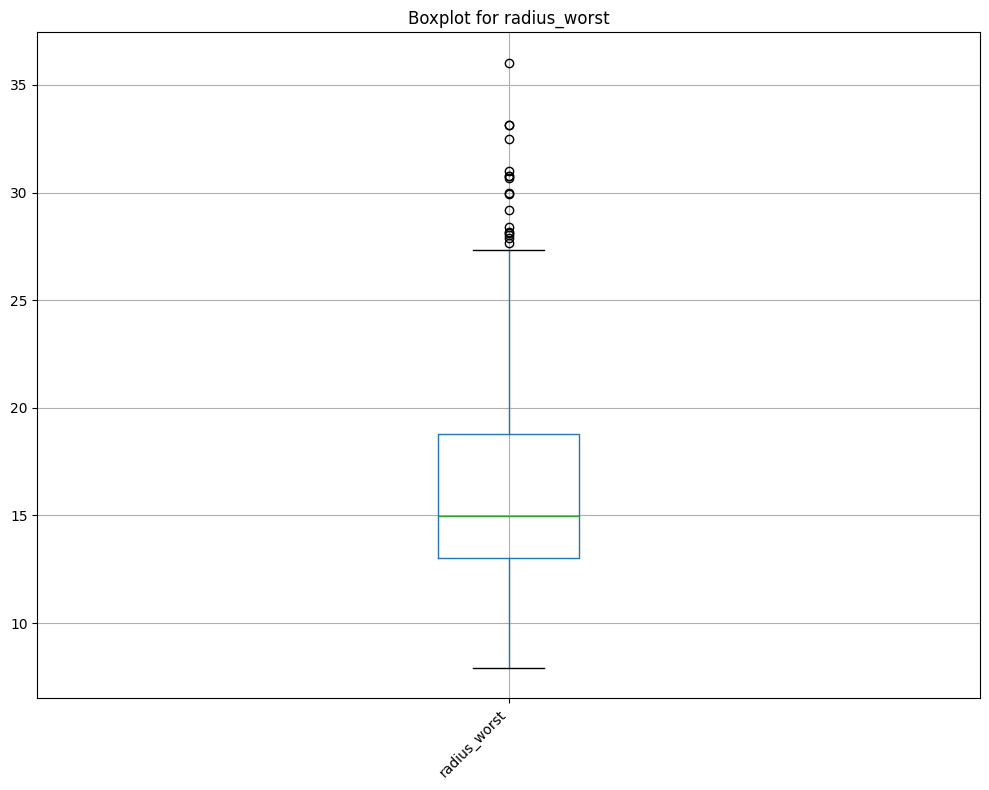

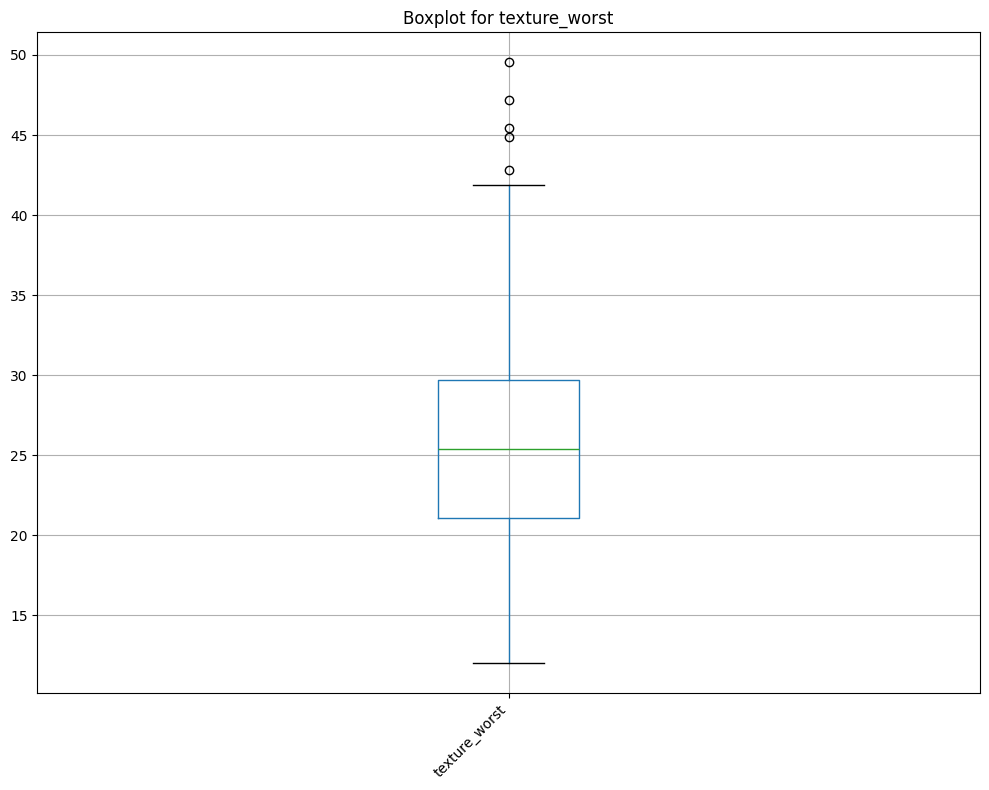

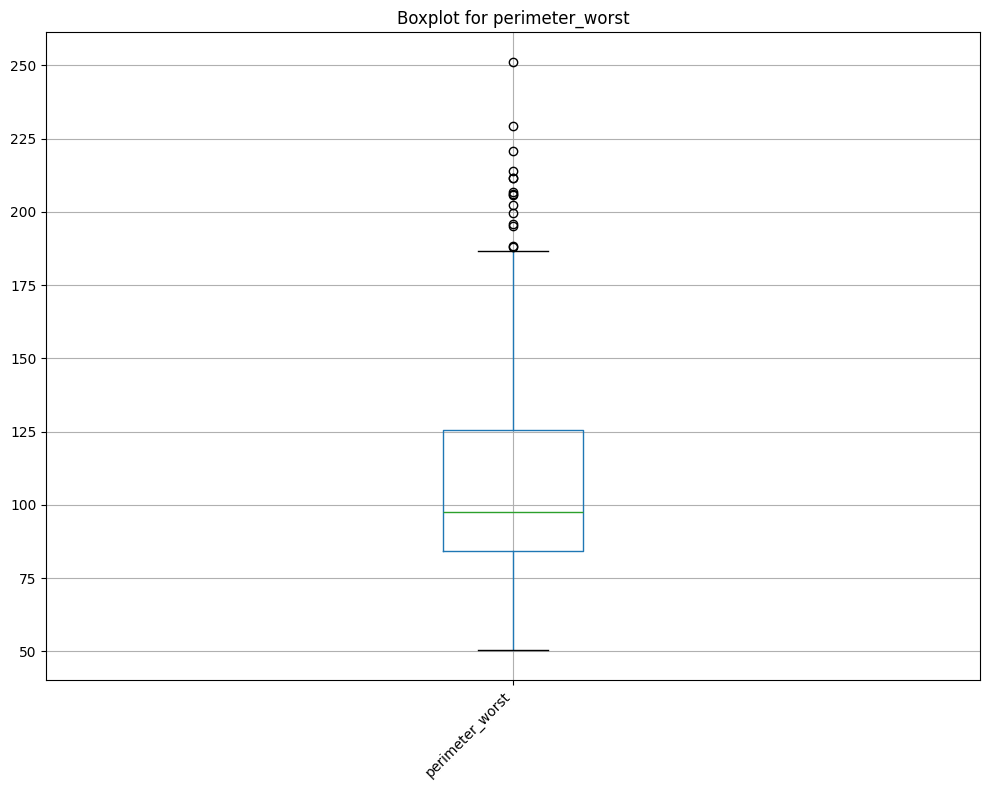

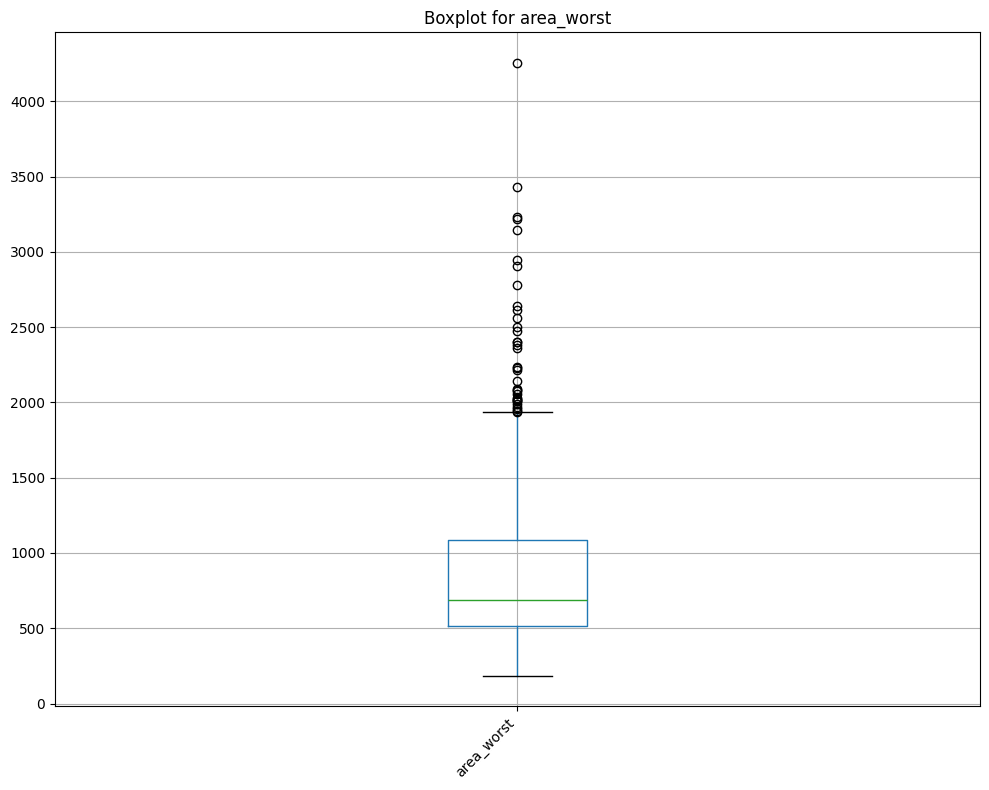

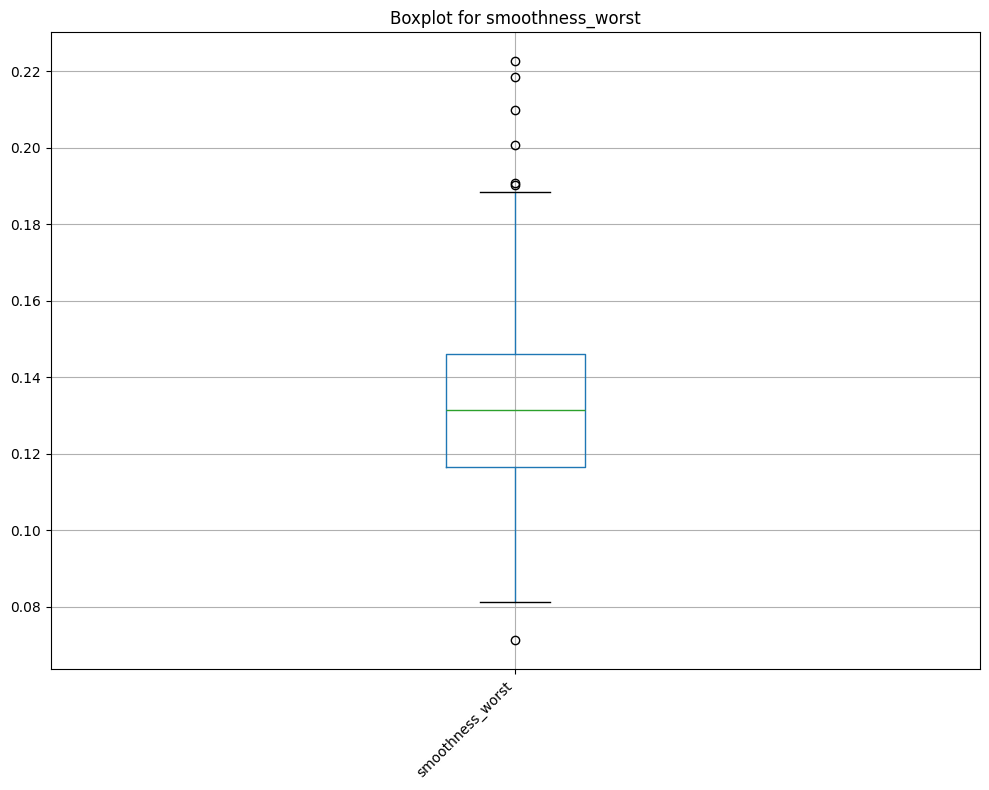

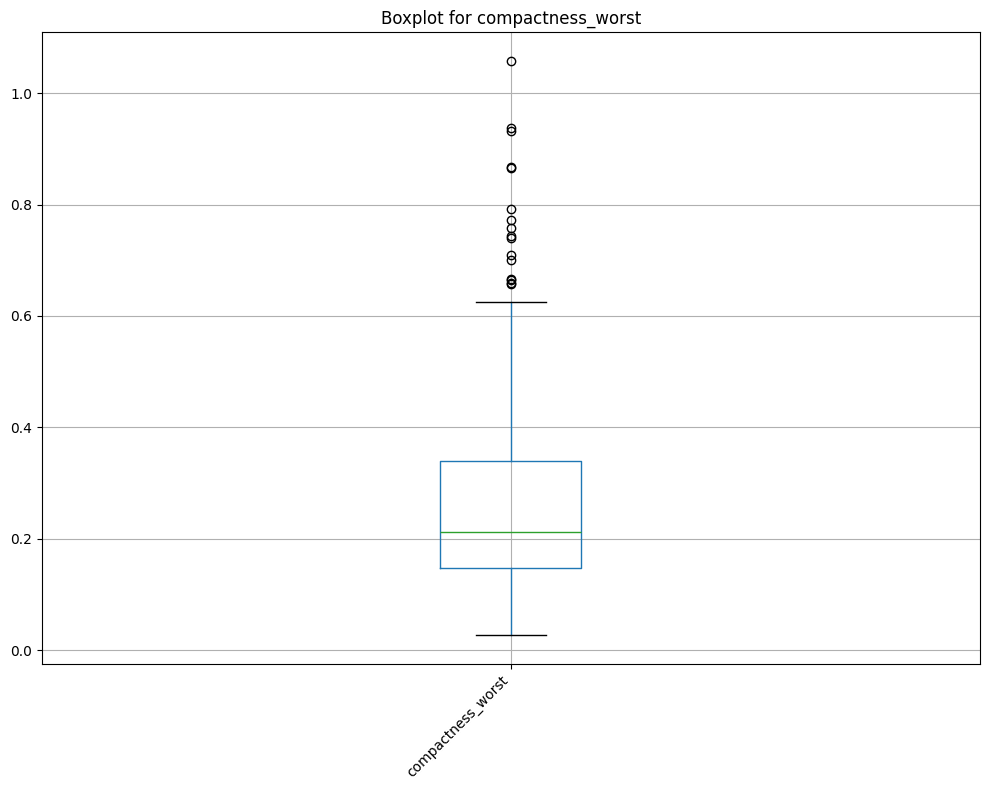

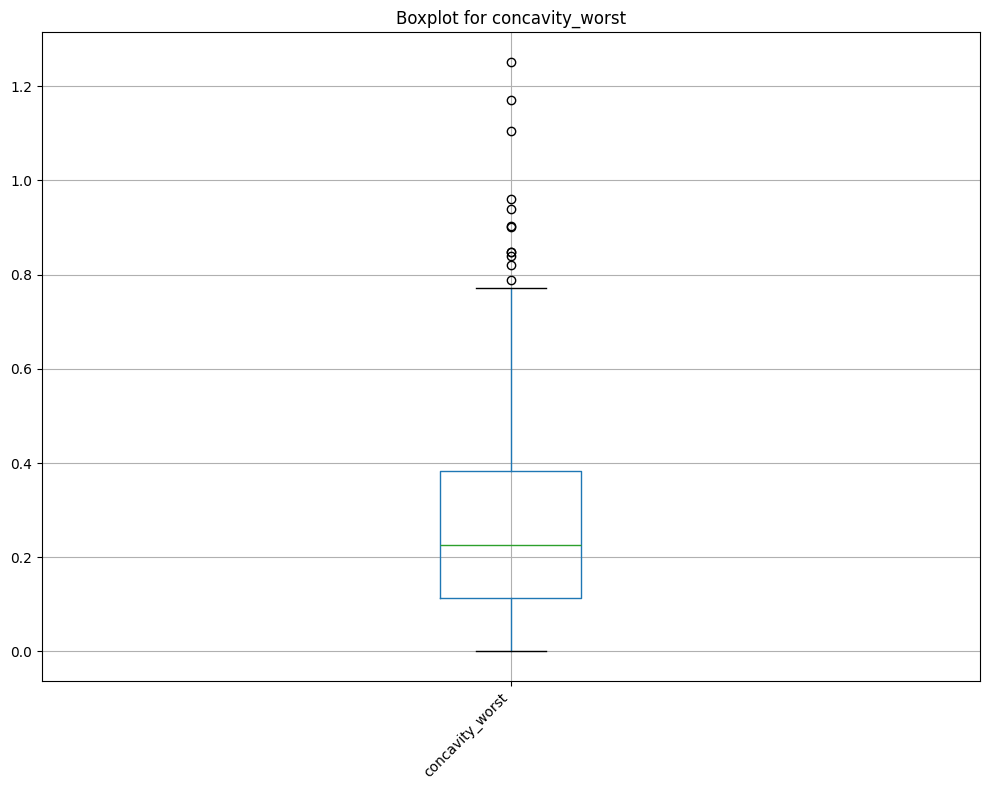

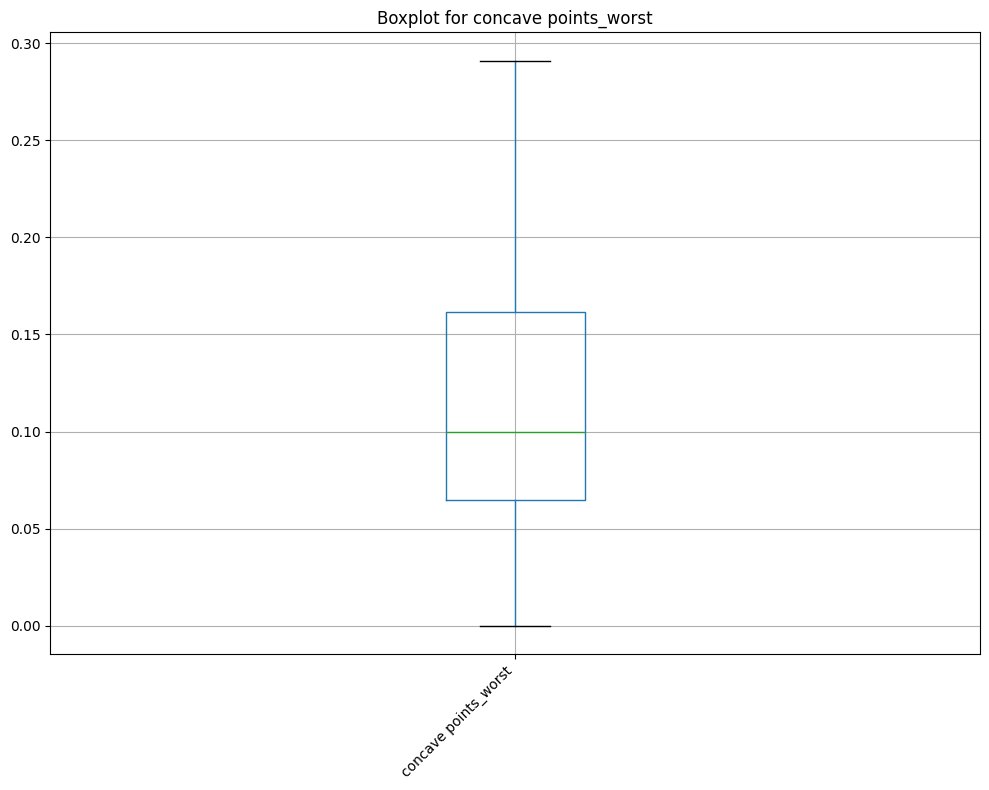

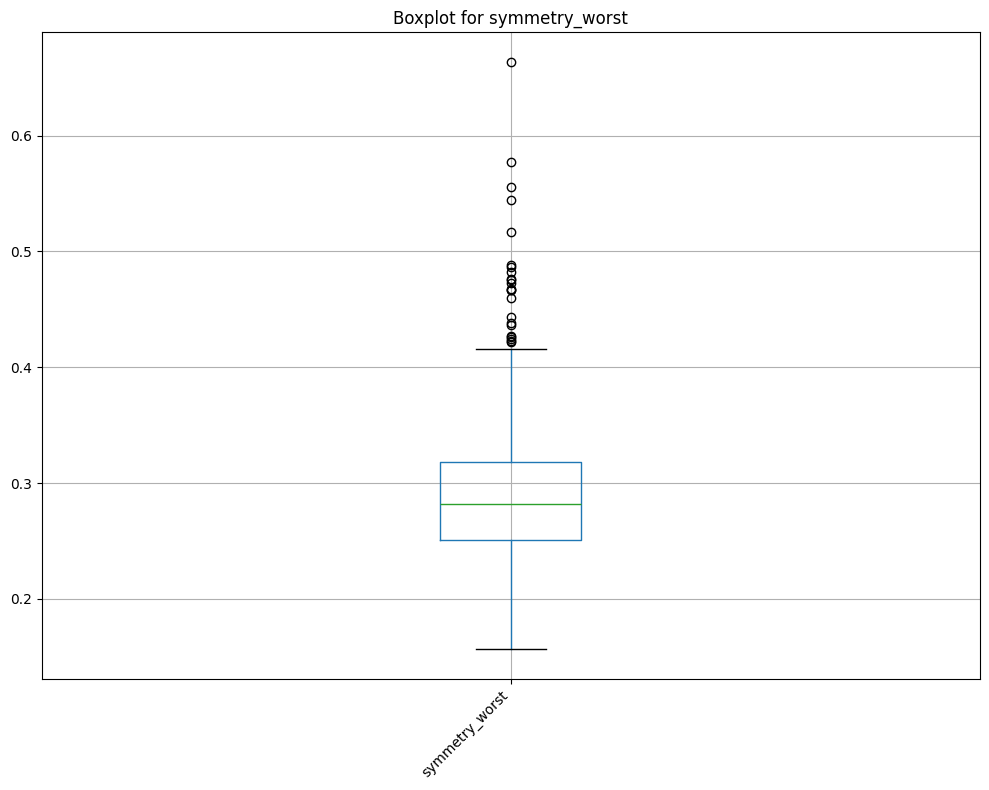

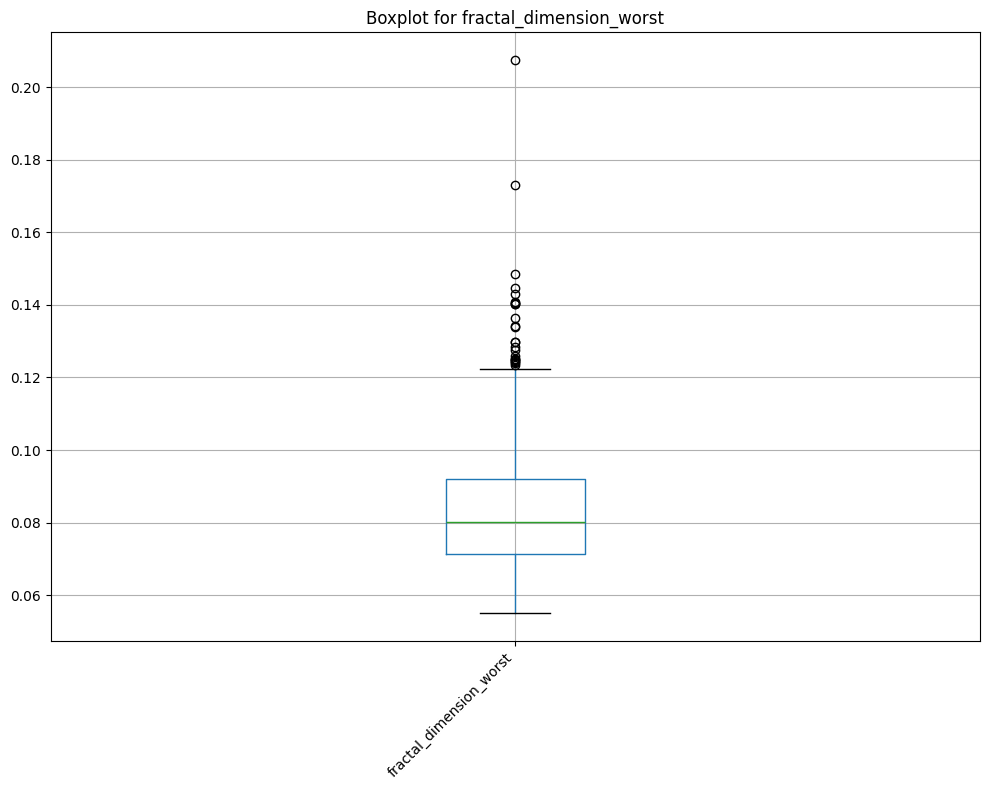

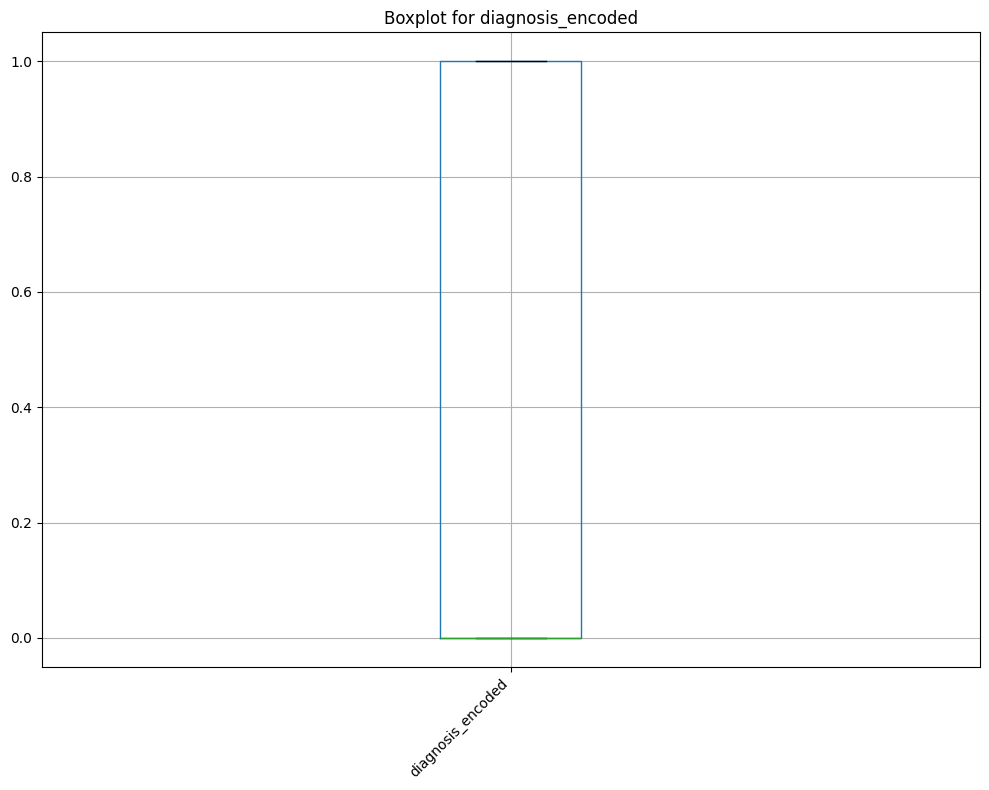

In [ ]:
#Identifying outliers
numerical_features = data.select_dtypes(include=np.number).drop(columns=['id'])

#Creating boxplots for each feature individually
for feature in numerical_features.columns:
    plt.figure(figsize=(10, 8))
    data.boxplot(column=feature)
    plt.title(f'Boxplot for {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

###Visualize feature distributions

<ipython-input-59-b348241223cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


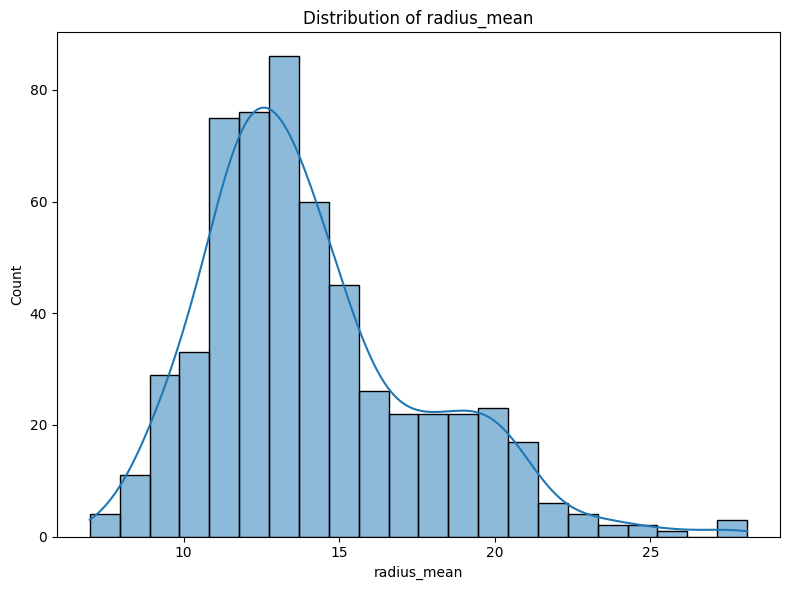

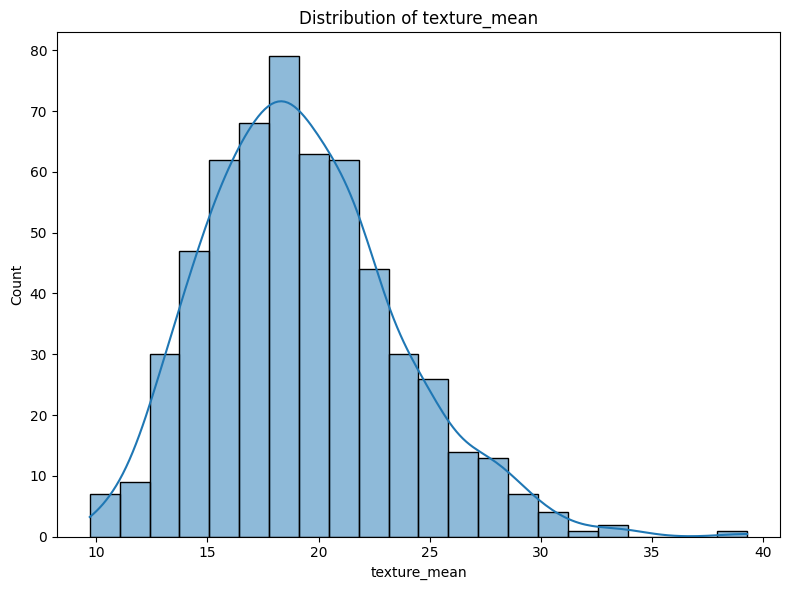

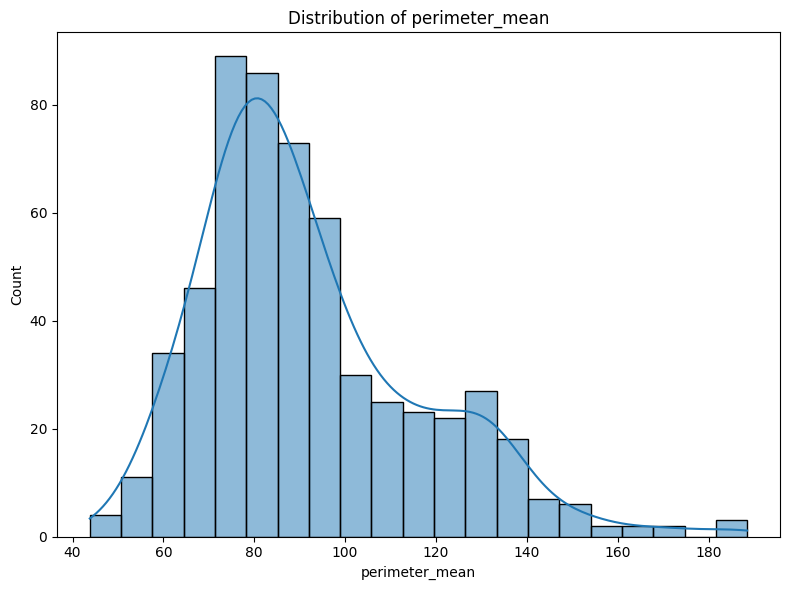

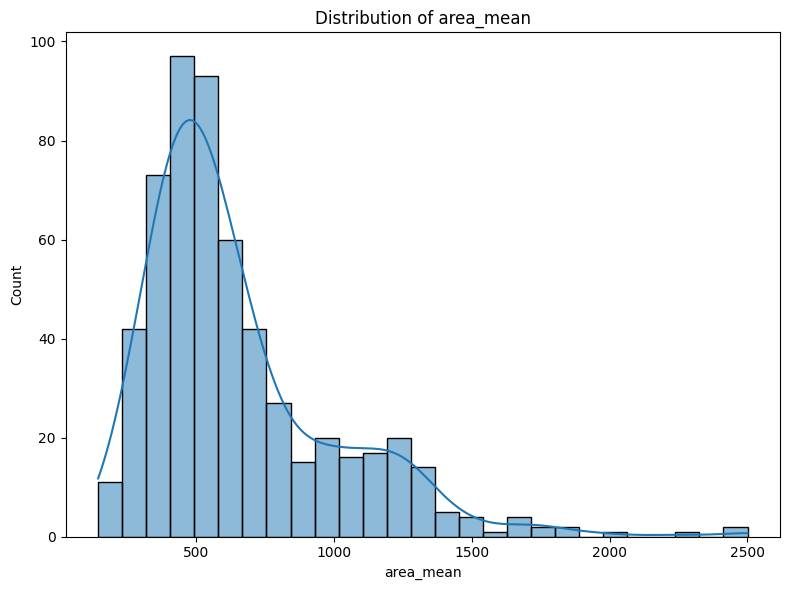

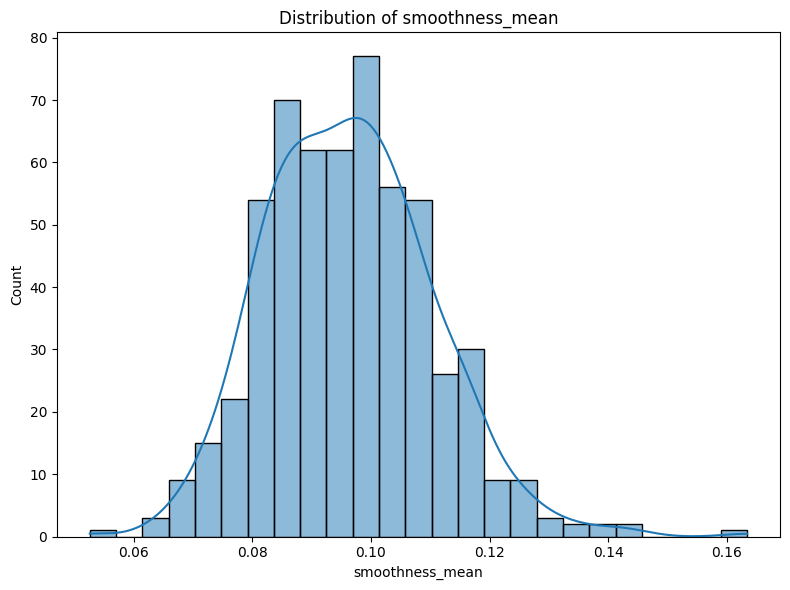

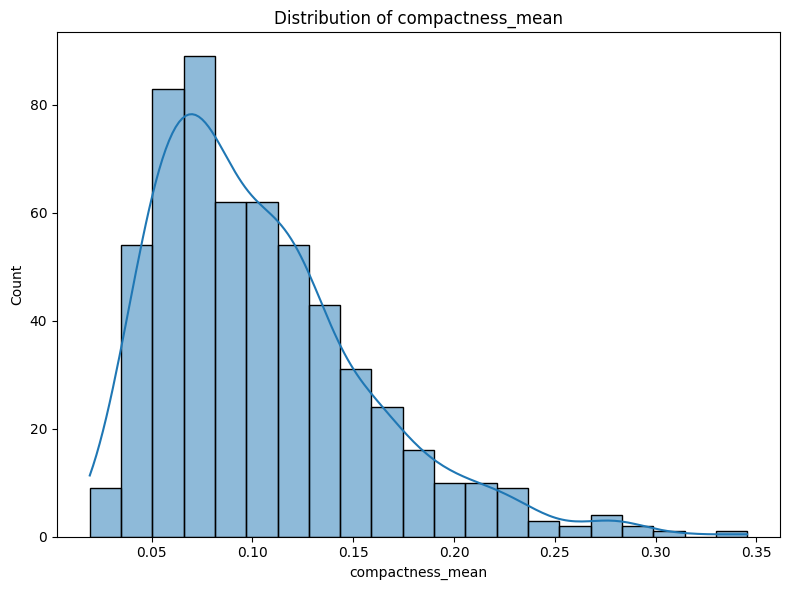

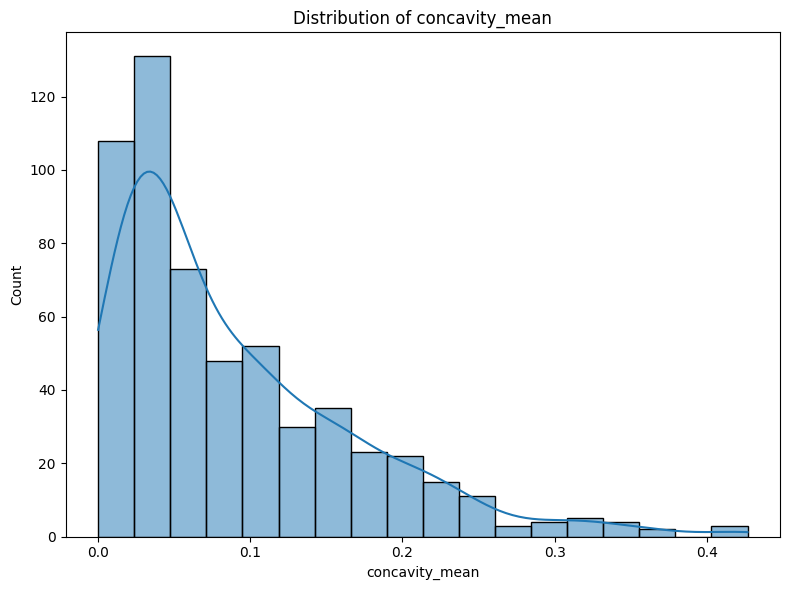

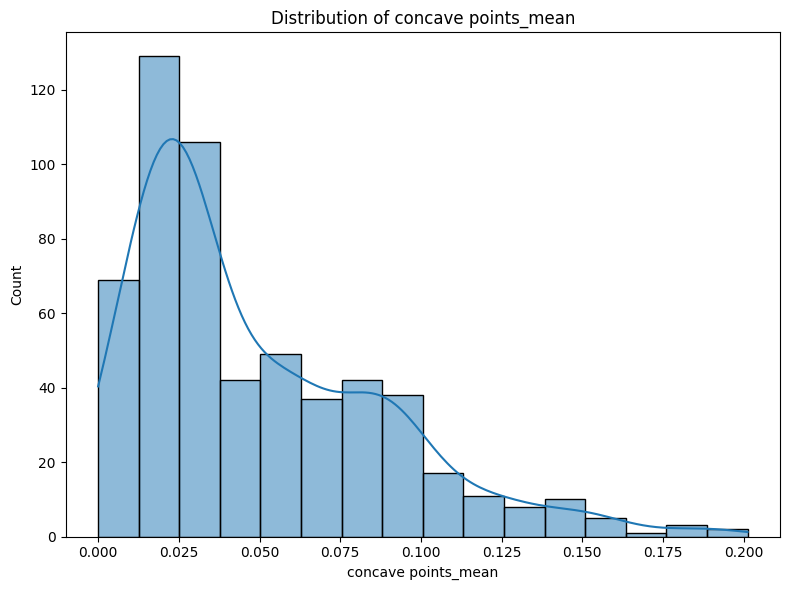

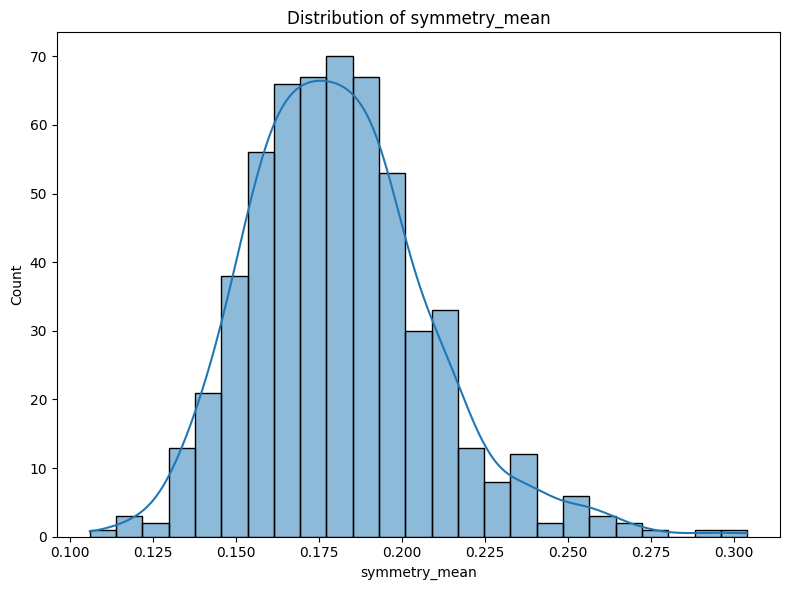

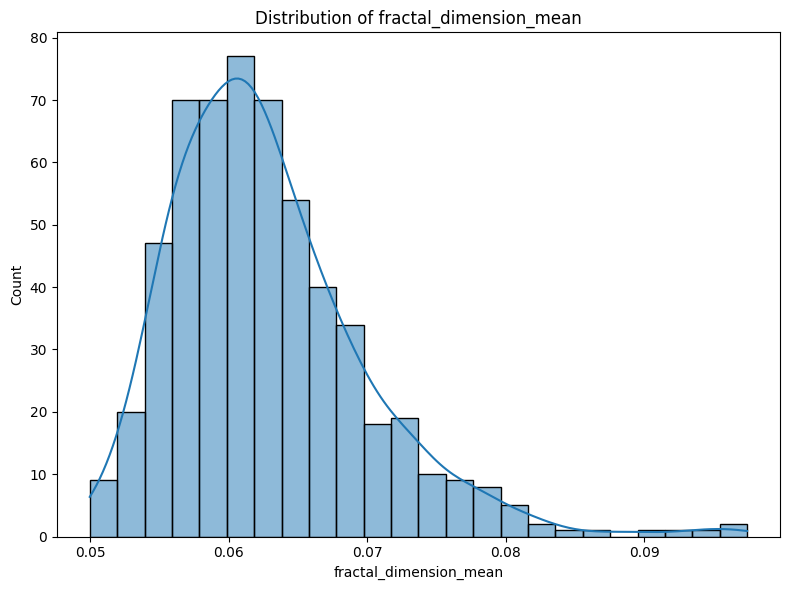

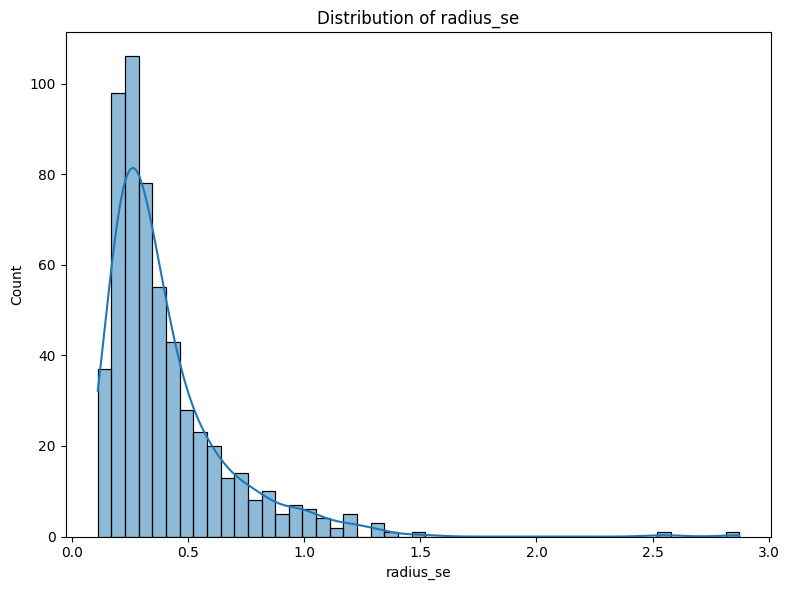

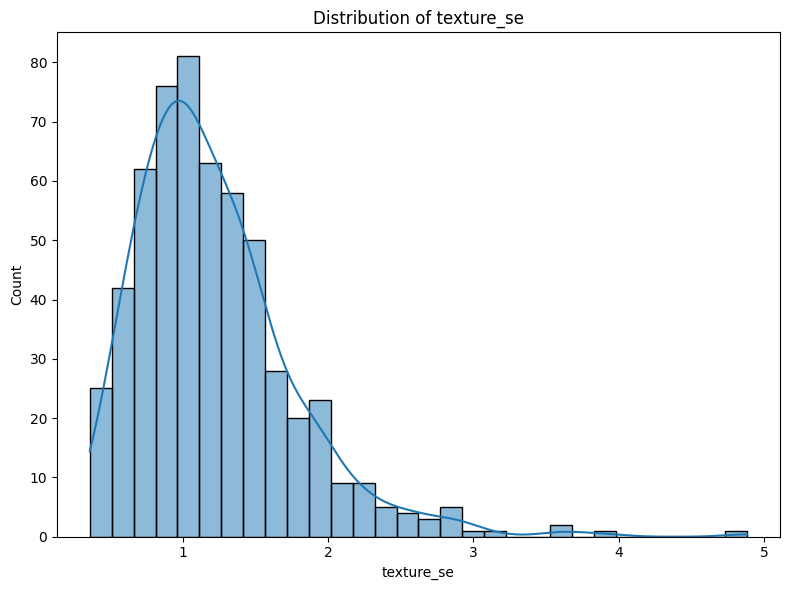

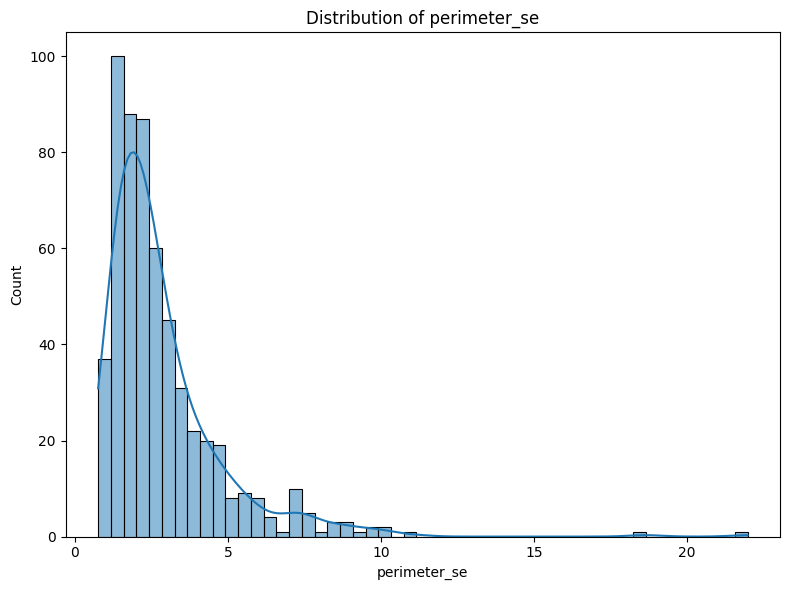

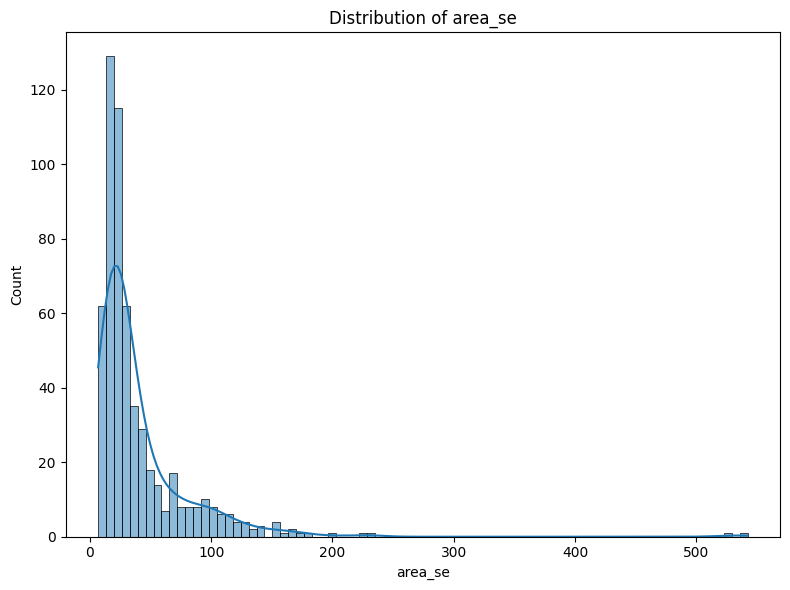

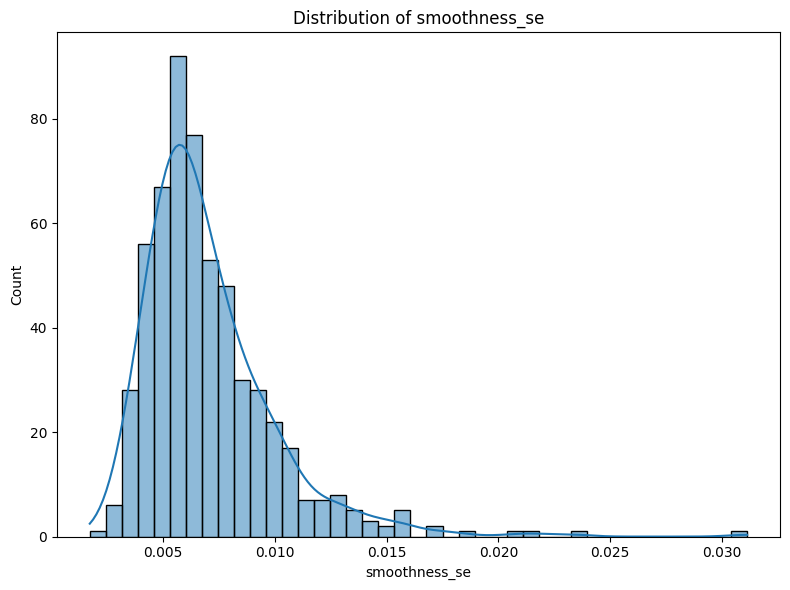

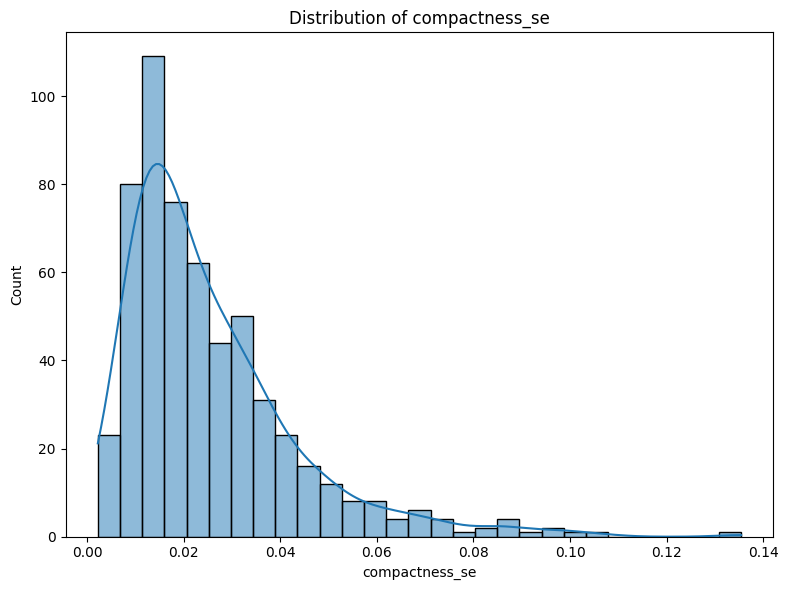

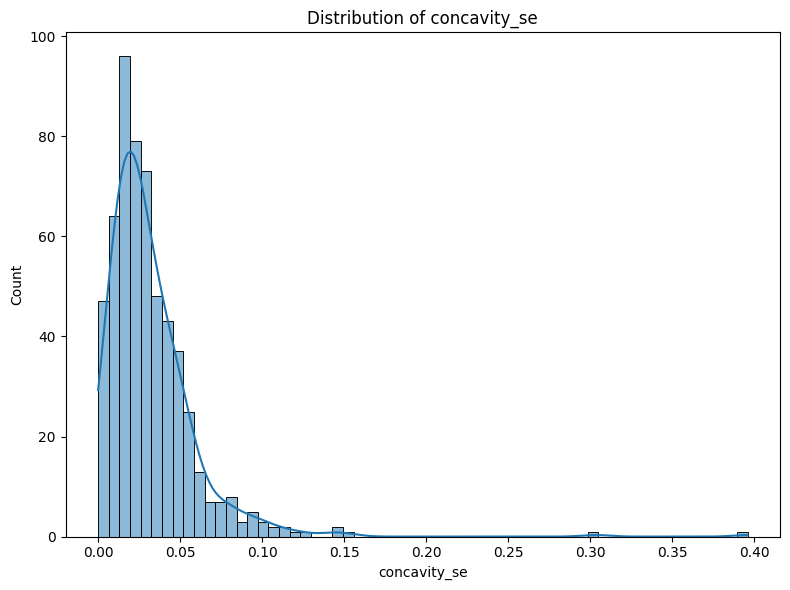

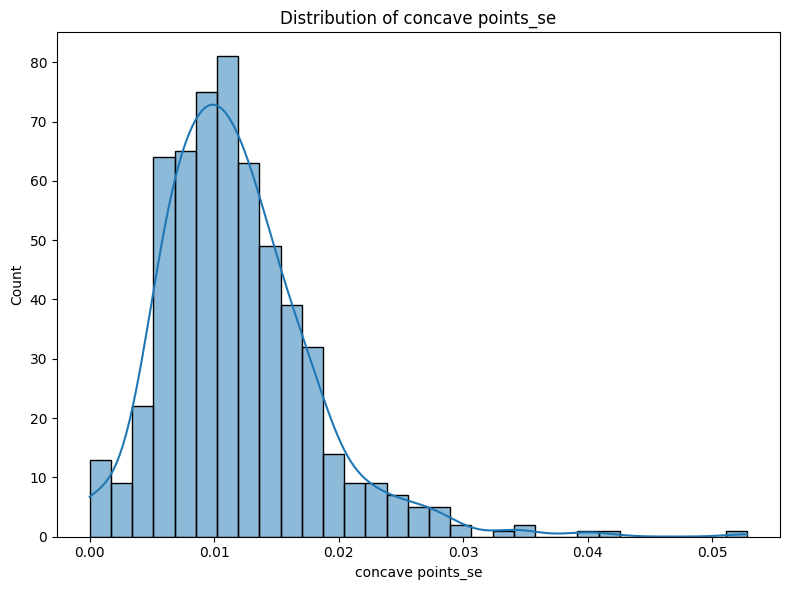

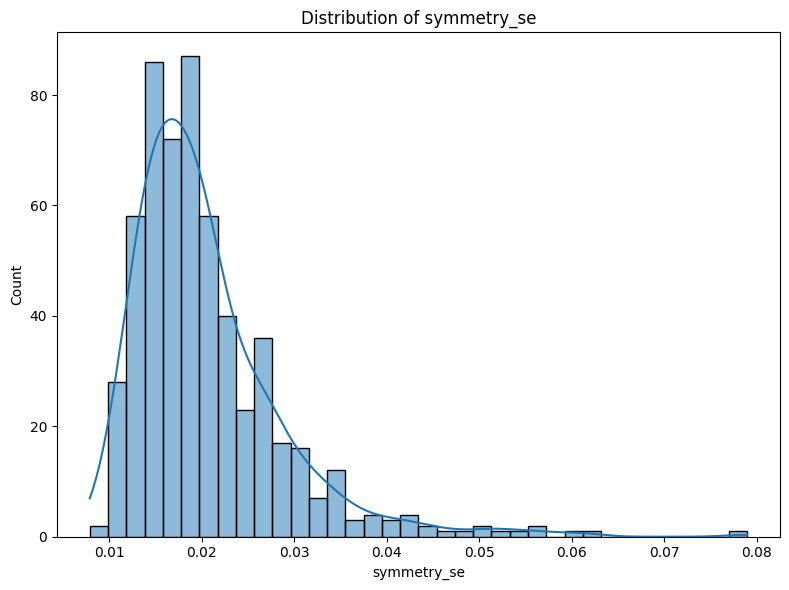

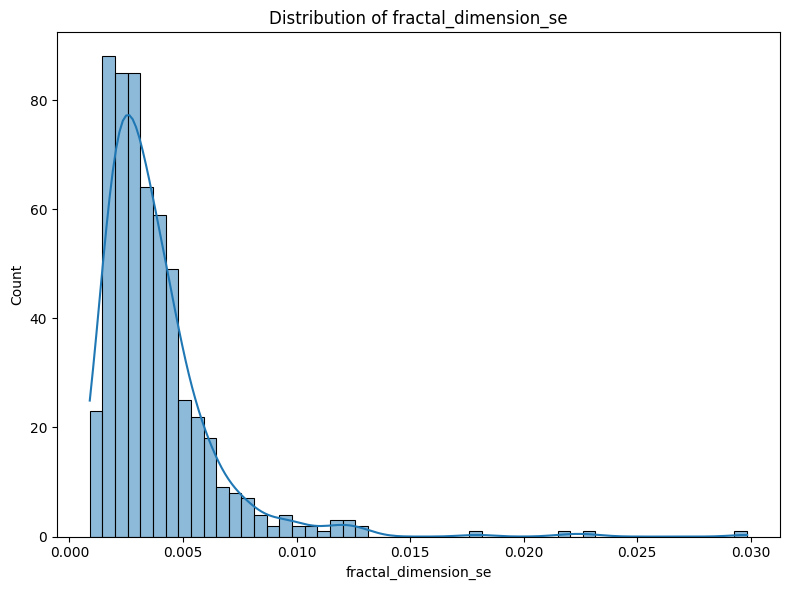

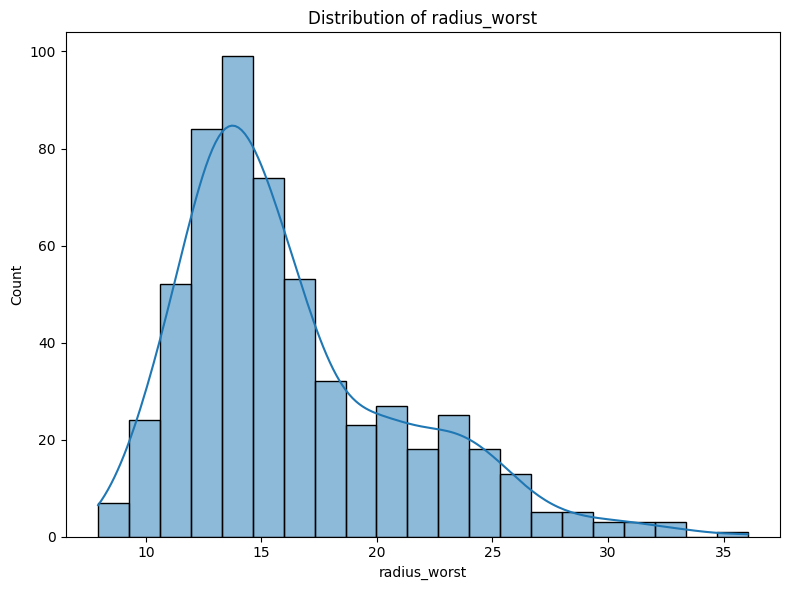

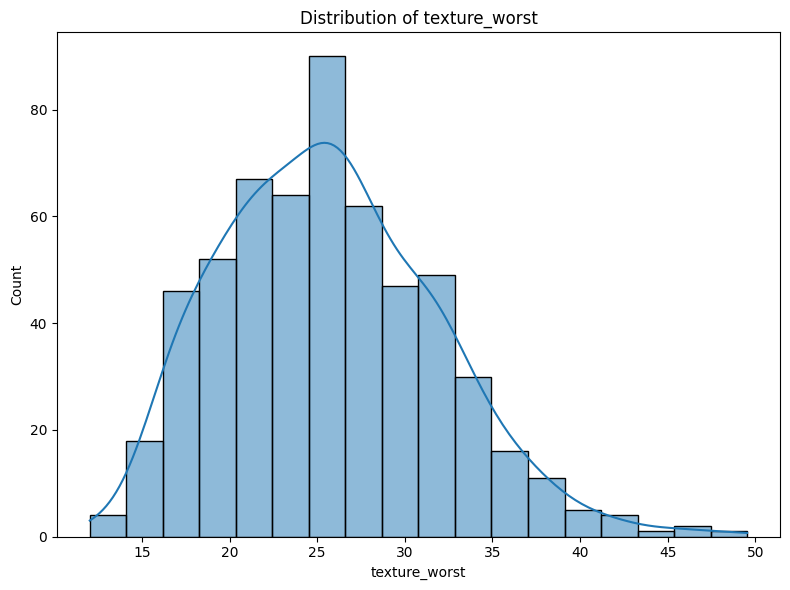

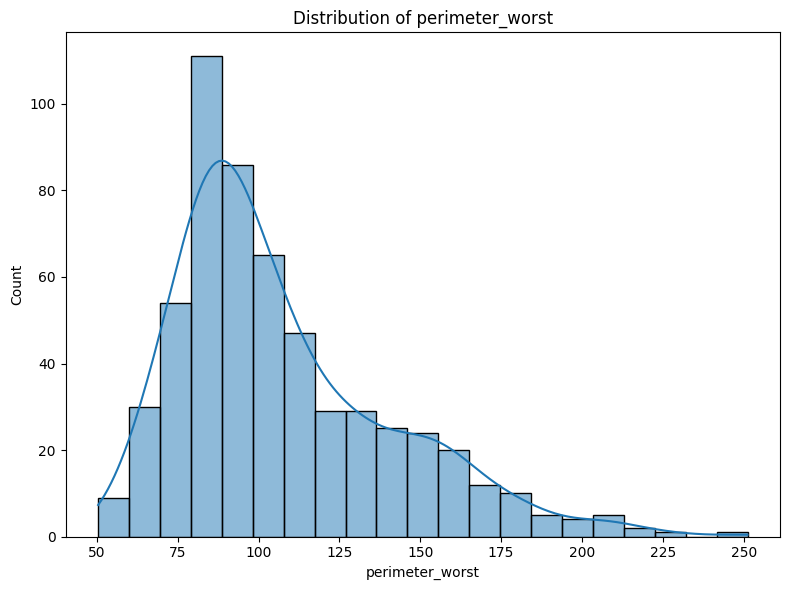

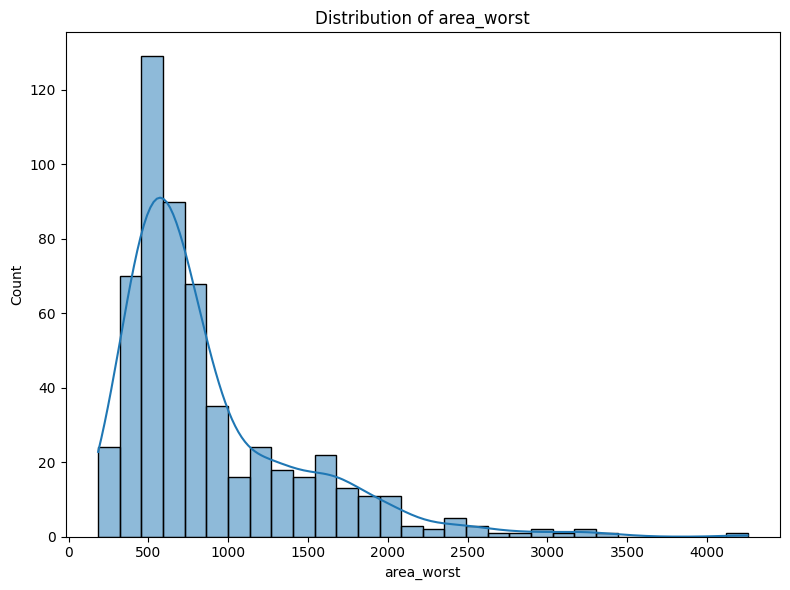

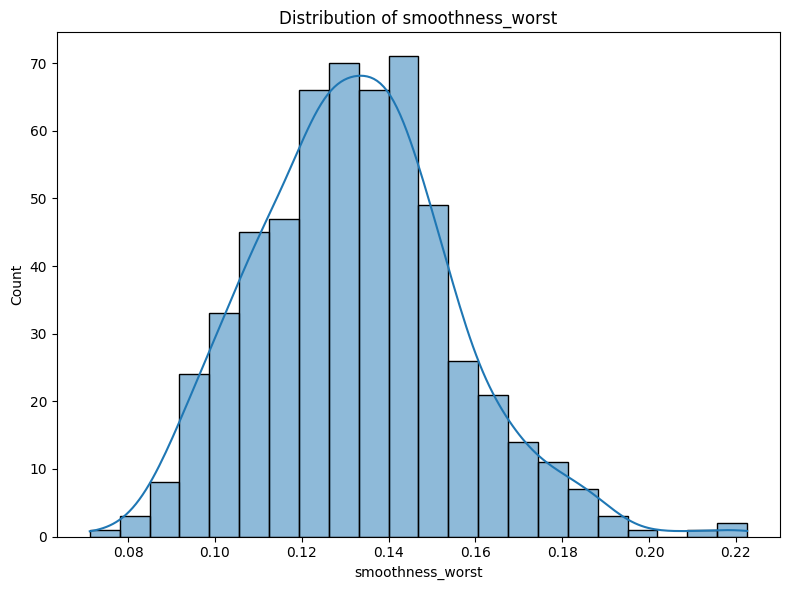

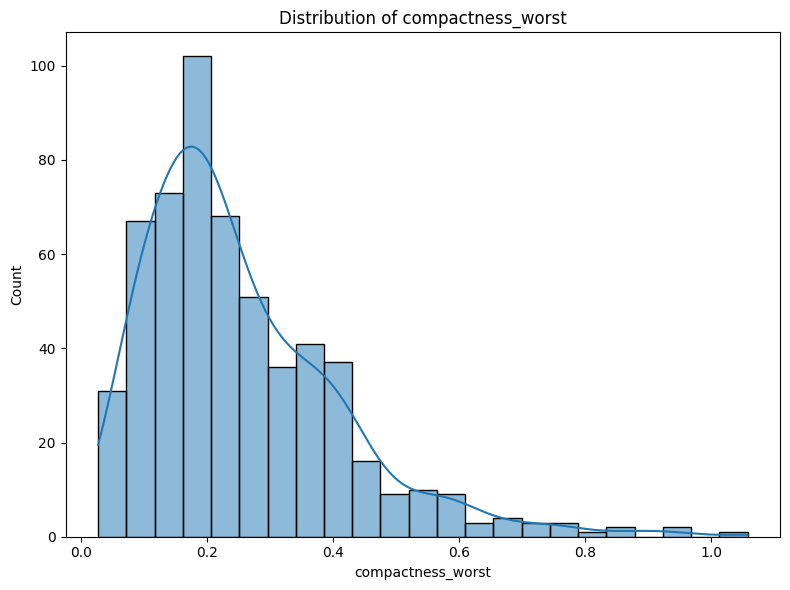

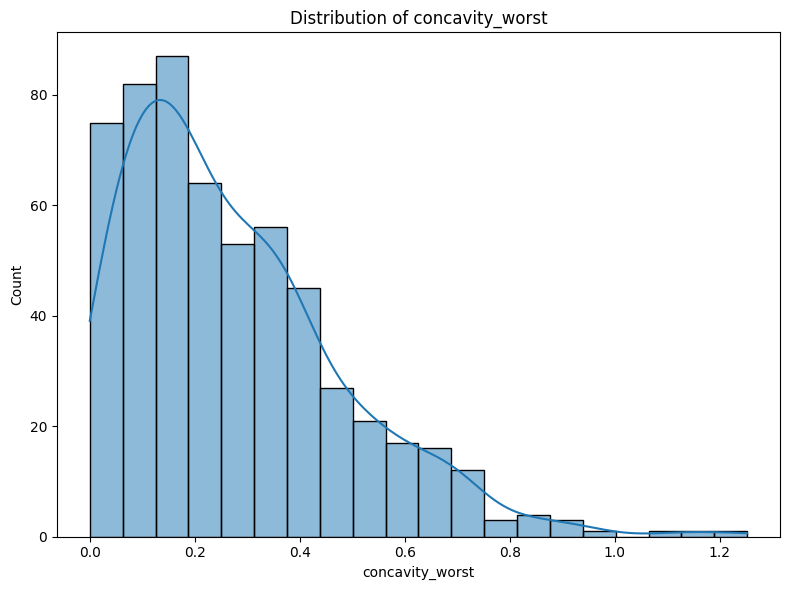

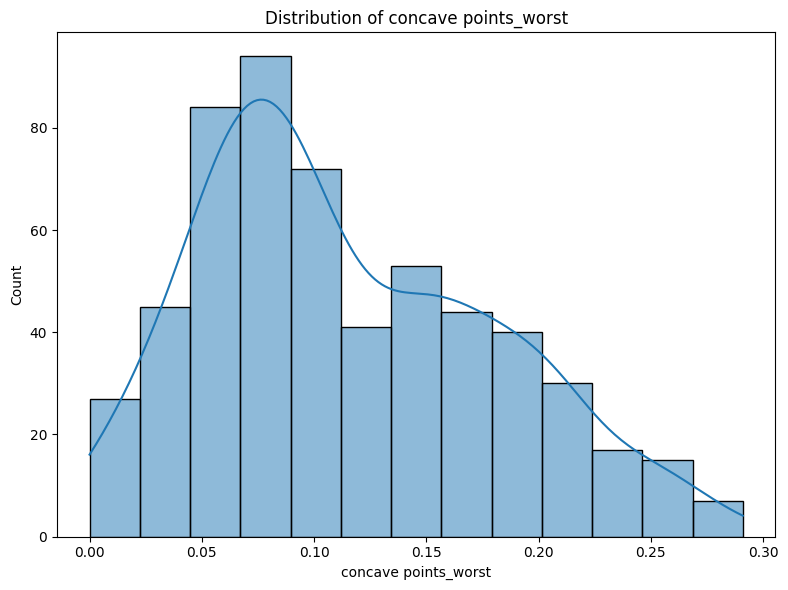

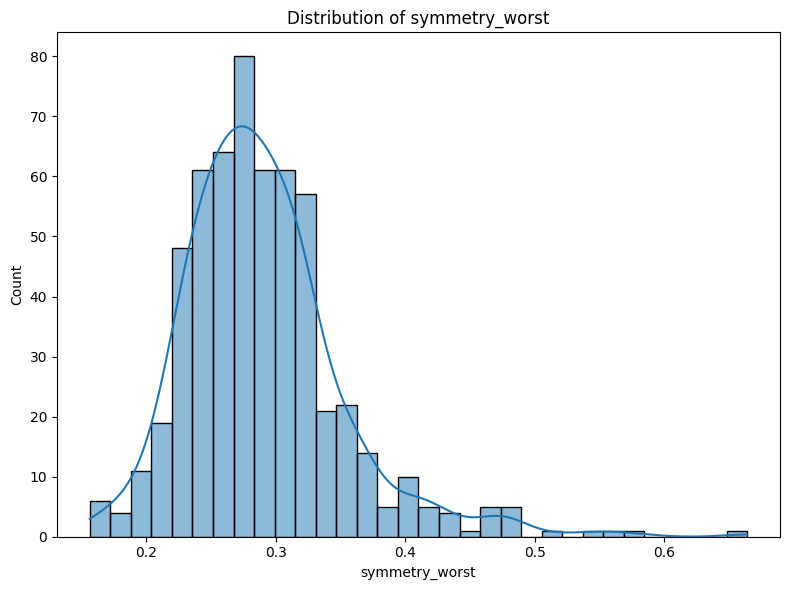

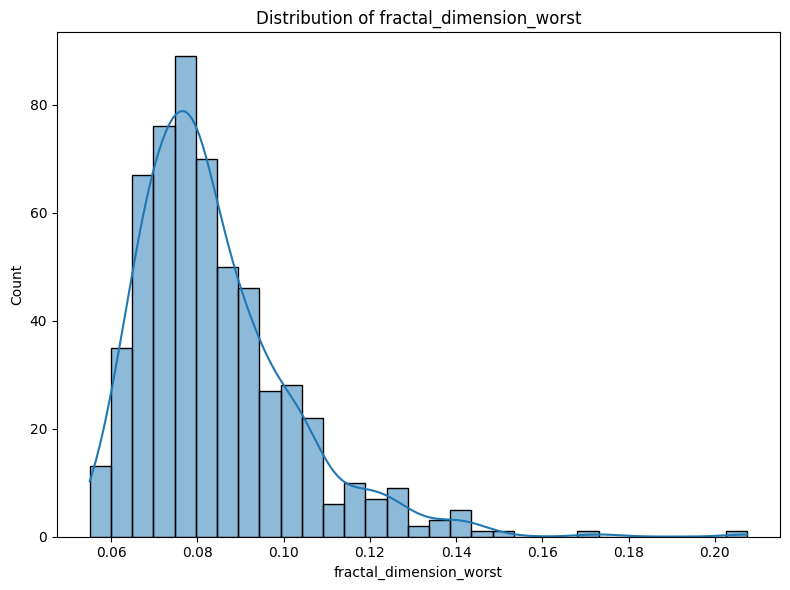

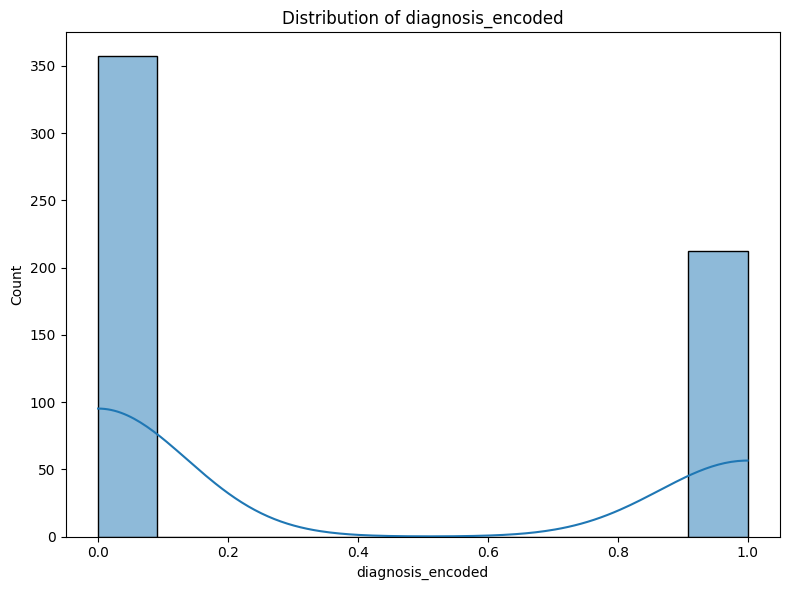

In [ ]:
#Visualizing feature distributions
for feature in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout();

###Normalize the dataset

In [ ]:
#selectign numerical columns for scalling
numerical_features = data.select_dtypes(include=np.number).drop(columns=['id'])

#Normalizing the dataset
scaler = StandardScaler()
data[numerical_features.columns] = scaler.fit_transform(data[numerical_features.columns])


###Split data into training & testing sets

In [ ]:
#Splitting data into training and testing sets
X = data.drop(columns=['id', 'diagnosis', 'diagnosis_encoded'])
y = data['diagnosis_encoded']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##Phase 2: PCA for dimensionality reduction

###Analyze the impact of reducing the number of features on classification performance.

###Compute the explained variance ratio for different number of principal components.

###Select the number of components that retain 95% of variance.

In [ ]:
#Analyzing impact of reducing no. of features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance ratio: [0.4325482  0.19732988 0.09865421 0.0625777  0.053537   0.04102624
 0.02274171 0.01636683 0.01404727 0.01198947]
Number of components selected: 10


###Visualize the data in 2D using the first two principal components.

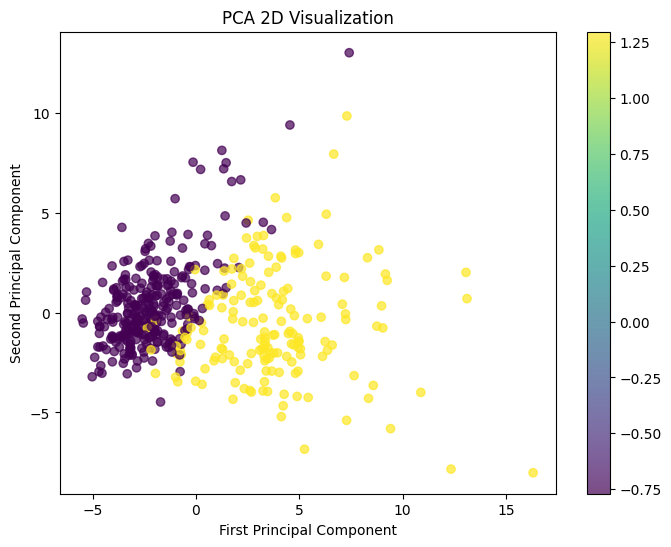

In [ ]:
# Visualize using the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D Visualization')
plt.colorbar()
plt.show()

##Model Training & Evaluation

###Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Converting to integers representing classes
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# List of hyperparameters to try
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.01, 0.1, 1, 10, 100]
gammas = ['scale', 'auto', 0.001, 0.01, 0.1, 1]

best_score = 0
best_params = {}

# Grid search over a subset of hyperparameters
for kernel in kernels:
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C, gamma='scale', probability=True, random_state=42)
        svm_model.fit(X_train, y_train)  # Now using categorical target
        score = svm_model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_params = {'kernel': kernel, 'C': C}

print("Best SVM parameters (original):", best_params)
print("Best SVM accuracy (original):", best_score)

# Evaluating the best SVM on PCA-transformed data
svm_pca = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma='scale', probability=True, random_state=42)
svm_pca.fit(X_train_pca, y_train)
score_pca = svm_pca.score(X_test_pca, y_test)
print("Best SVM accuracy (PCA-transformed):", score_pca)


Best SVM parameters (original): {'kernel': 'linear', 'C': 0.1}
Best SVM accuracy (original): 0.9824561403508771
Best SVM accuracy (PCA-transformed): 0.9824561403508771


####Evaluation Metrics

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[69  2]
 [ 3 40]]


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Without pruning
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree (unpruned) accuracy:", dt_model.score(X_test, y_test))

# With pruning parameters (pre-pruning)
dt_pruned = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_pruned.fit(X_train, y_train)
print("Decision Tree (pruned) accuracy:", dt_pruned.score(X_test, y_test))

# Visualize the pruned tree
dot_data = export_graphviz(dt_pruned, out_file=None,
                           feature_names=X.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


Decision Tree (unpruned) accuracy: 0.9473684210526315
Decision Tree (pruned) accuracy: 0.956140350877193


'decision_tree.pdf'

####Evaluation

In [ ]:
y_pred_dt = dt_pruned.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[69  2]
 [ 3 40]]


###Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture (using original data)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network (original) accuracy:", accuracy)

# Using PCA-transformed data
model_pca = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_pca.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_pca = model_pca.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
loss_pca, accuracy_pca = model_pca.evaluate(X_test_pca, y_test)
print("Neural Network (PCA-transformed) accuracy:", accuracy_pca)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9651 - loss: 0.1999
Neural Network (original) accuracy: 0.9649122953414917
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9558 - loss: 0.1994 
Neural Network (PCA-transformed) accuracy: 0.9649122953414917


##Phase 3: Model Comparison

###Model Comparison

In [ ]:
# Model Comparison
models = {
    "SVM": svm_model,
    "SVM (PCA)": svm_pca,
    "Decision Tree": dt_pruned,
    "Neural Network": model,
    "Neural Network (PCA)": model_pca
}

results = []
for name, model in models.items():
    if name.endswith("(PCA)"):
        y_pred = model.predict(X_test_pca)
    else:
        y_pred = model.predict(X_test)

    if name in ["Neural Network", "Neural Network (PCA)"]:
        y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred_binary = y_pred

    report = classification_report(y_test, y_pred_binary, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score'],
        "ROC-AUC": roc_auc_score(y_test, y_pred) if name in ["SVM", "SVM (PCA)", "Neural Network", "Neural Network (PCA)"] else roc_auc_score(y_test, y_pred_binary) # Calculate ROC-AUC if applicable
    })

results_df = pd.DataFrame(results)
print(results_df)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
                  Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0                   SVM  0.956140   0.956088  0.956140  0.956036  0.951032
1             SVM (PCA)  0.982456   0.982456  0.982456  0.982456  0.981330
2         Decision Tree  0.956140   0.956088  0.956140  0.956036  0.951032
3        Neural Network  0.964912   0.964912  0.964912  0.964912  0.992794
4  Neural Network (PCA)  0.964912   0.965828  0.964912  0.965060  0.992466


###Confusion Matrices

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


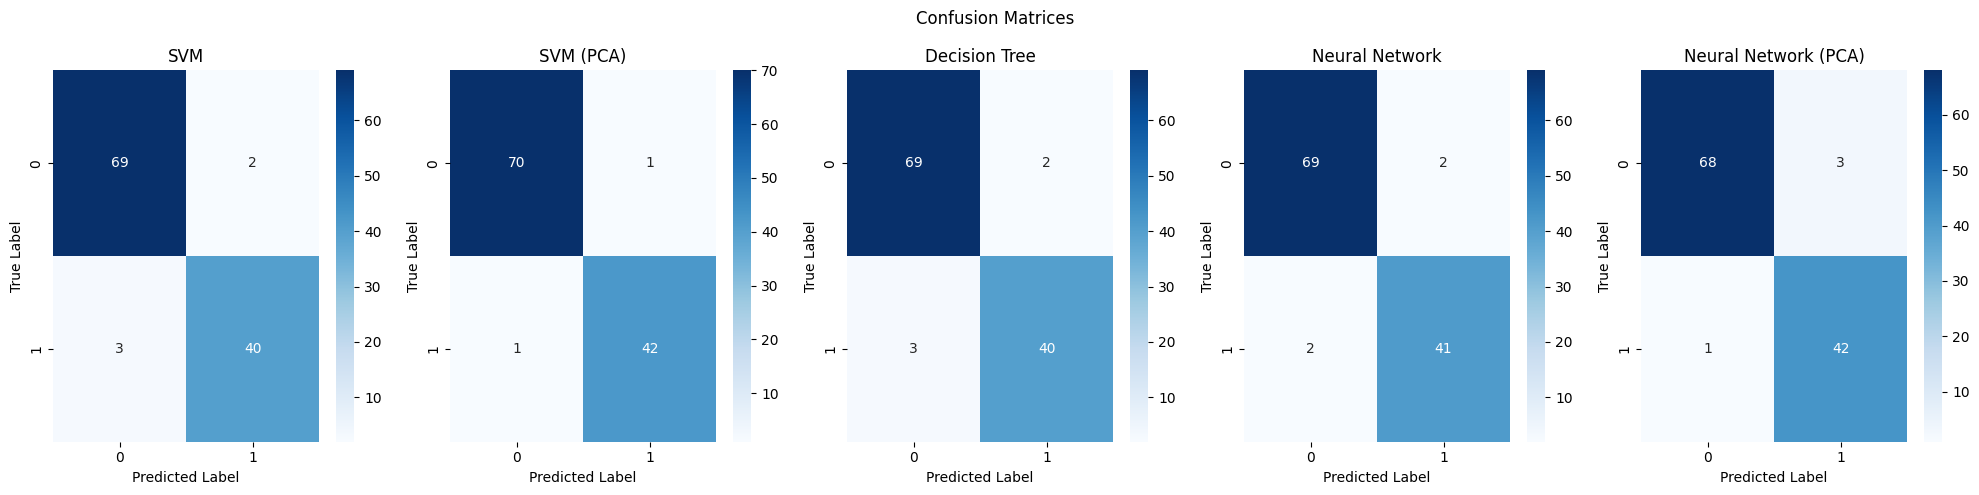

In [ ]:
# Confusion Matrices
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
fig.suptitle("Confusion Matrices")

for i, (name, model) in enumerate(models.items()):
    if name.endswith("(PCA)"):
        y_pred = model.predict(X_test_pca)
    else:
        y_pred = model.predict(X_test)

    if name in ["Neural Network", "Neural Network (PCA)"]:
        y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred_binary = y_pred

    cm = confusion_matrix(y_test, y_pred_binary)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


###PCA Variance Plot

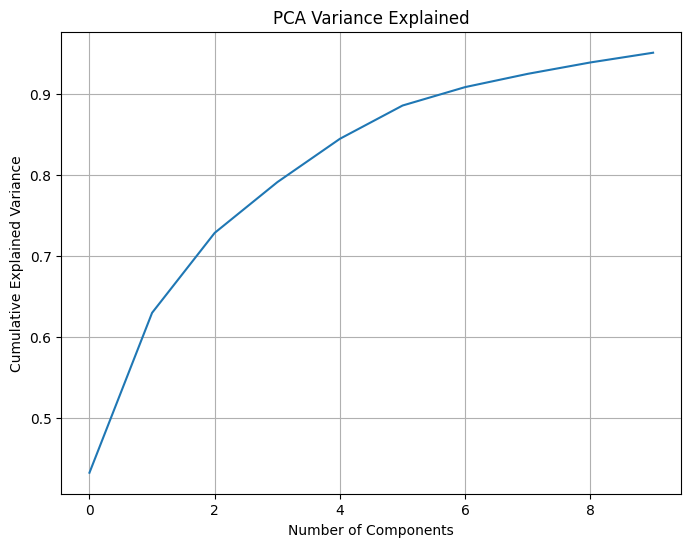

In [ ]:
# PCA Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.grid(True)
plt.show()



###Roc Curves

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


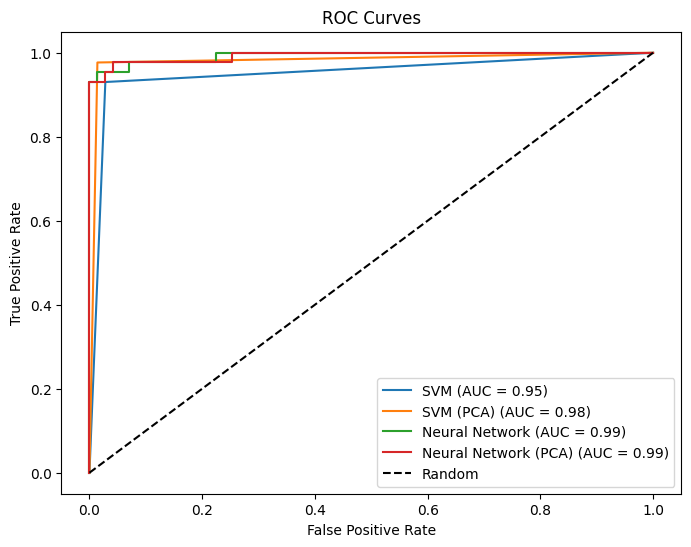

In [ ]:
# ROC Curves
fig, ax = plt.subplots(figsize=(8, 6))
for name, model in models.items():
    if name in ["SVM", "SVM (PCA)", "Neural Network", "Neural Network (PCA)"]:  # Models with predict_proba
        if name.endswith("(PCA)"):
            y_score = model.predict(X_test_pca)
            # For Keras models, predict already returns probabilities for binary classification
        else:
            y_score = model.predict(X_test)
            # For Keras models, predict already returns probabilities for binary classification

        # For binary classification, take the probability of class 1
        y_score = y_score[:, 0] if y_score.ndim > 1 else y_score

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves")
ax.legend(loc="lower right")
plt.show()